# Heart Disease Prediction

**Author**: Álvaro López

## Table of contents

1. [Data analytics problem](#Data-analytics-problem)
2. [Analytical objective](#Analytical-objective)
3. [Methodology](#Methodology)
4. [Dataset](#Dataset)
5. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
    5.1. [Missing values](#Missing-values)<br>
    5.2. [Quantitative variables](#Quantitative-variables)<br>
    5.3. [Qualitative variables](#Qualitative-variables)   
6. [Data cleansing](#Data-cleansing)<br>
    6.1. [Outliers detection and correction](#Outliers-detection-and-correction)<br>
    6.2. [One Hot Encoding](#One-Hot-Encoding)<br>
    6.3. [Normalization](#Normalization)    
7. [Models creation](#Models-creation)<br>
    7.1. [Logistic Regression](#lr)<br>
    7.2. [Support Vector Machines](#svm)<br>
    7.3. [K-Nearest Neighbors](#knn)<br>
    7.4. [Decision Tree](#dt)<br>
    7.5. [Random Forest](#rf)<br>
    7.6. [Gradient Boosting](#gb)
8. [Models comparison](#models-comparison)
9. [Conclusions](#conclusions)
10. [References](#references)

## 1. Data analytics problem <a id="Data-analytics-problem"> </a>

**Cardiovascular diseases are the leading cause of death worldwide**, claiming around 17.9 million lives every year, which represents 32% of total deaths. 85% were due to heart attacks and strokes [[1]](#reference1).

Cardiovascular diseases are made up of all those diseases that affect the heart and the blood vessels. Among them are heart diseases, which affect the structure or the function of the organ.

Coronary heart disease or atherosclerosis is the main type of heart disease. It occurs when plaque (made up of fat, cholesterol and other substances) builds up in the arteries. The arteries narrow, making it difficult for oxygen-rich blood to flow to the heart. It can also create blood clots and block blood flow, leading to a heart attack or stroke [[2]](#reference2).

One third of deaths from cardiovascular disease occur in people under the age of 70 due to risk factos, including the harmful use of tabacco and alcohol, an unhealthy diet, high blood cholesterol levels, diabetes, or high blood pressure, among others.

## 2. Analytical objective <a id="Analytical-objective"> </a>

Having this said, the importance of detecting and monitoring people with cardiovascular diseases or with a high risk of suffering them, based on some of the risk factor, is clear.

The analytical question that is intended to be resolved is: **does the patient present a heart disease according to some of the typical characteristics to identify it?**

To solve the main analytical objective, it is necessary to resort to machine learning, specifically classification.

**We want to classify the existence or not of a heart disease** from the analysis of patients with whom it is know whether or not they suffer from a disease. The data is already labeled, therefore, a supervised learning will be carried out.

## 3. Methodology <a id="Methodology"> </a>

The methodology follows the phases of the data mining process for the extraction of knowledge.

1. **A data set must be available** with a significant number of observations for the defined goals and atributes necessary to detect the presence of a heart disease.
2. An **exploratory analysis of the disease** is then carried out. The structure of the data and its visual representation are analyzed.
3. **Cleaning and conditioning taks** are then carried out to improve the quality of the dataset.
4. When the dataset is ready, the **classification algorithms** are applied. Models are created and they are optimized by means of their parameters.
5. The supervised learning **models are evaluated** with the typical metrics calculated from the confusion matrix and the ROC curve.
6. The **final observations** are made and the analytical problem is answered.

## 4. Dataset <a id="Dataset"> </a>

The Kaggle dataset created by *fedesoriano* called Heart Failure Dataset has been chosen, with the *heart.csv* file where the data is located. It is a dataset containing 11 clinical features for the prediction of heart disease events [[3]](#reference3).

First, all the libraries that will be used throughout the project are loaded:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from statistics import mean
from sklearn import feature_selection
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import roc_curve, RocCurveDisplay, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

The dataset is loaded after downloading from Kaggle and the first five observations are displayed:

In [2]:
path = 'heart.csv'
data = pd.read_csv(path)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print("Dataset length:", len(data))

Dataset length: 918


In [4]:
data.dtypes.values

array([dtype('int64'), dtype('O'), dtype('O'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('O'), dtype('int64'),
       dtype('O'), dtype('float64'), dtype('O'), dtype('int64')],
      dtype=object)

In [5]:
cat_col = []
for index in data.dtypes.index:
    if data.dtypes[index] == 'object':
        cat_col.append(index)
print(cat_col)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [6]:
for col in cat_col:
    print(col,(data[col].unique()))

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


In [7]:
for col in cat_col:
    print(data[col].value_counts())
    print('-'*55)

Sex
M    725
F    193
Name: count, dtype: int64
-------------------------------------------------------
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
-------------------------------------------------------
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
-------------------------------------------------------
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
-------------------------------------------------------
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
-------------------------------------------------------


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


To calculate summary statistics on numeric data we use `describe()`.

In [9]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The dataset is made up of 913 observations and 12 variables (6 integer type, 1 float type and 5 string type), define below:

- **Age**: age of the patient
- **Sex**: sex of the patient (M: Male, F: Female)
- **ChestPainType**: chest pain type [TA: Typical Angina, Ata: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP**: resting blood pressure [mm Hg]
- **Cholesterol**: serum cholesterol [mm/dl]
- **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mm/dl; 0: otherwise]
- **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
- **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
- **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease**: output class [1: heart disease, 0: Normal]

## 5. Exploratory Data Analysis <a id="Exploratory-Data-Analysis"> </a>



### 5.1. Missing values <a id="Missing-values"> </a>

Before looking at distributions and correlations, the dataset is checked to see if it contains missing values.

In [10]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
print("Unique values for categorical columns\n")

for col in data.select_dtypes(include='object').columns:
    print(data[col].value_counts(),'\n')

Unique values for categorical columns

Sex
M    725
F    193
Name: count, dtype: int64 

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64 

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64 

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64 

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64 



In [12]:
# Checking for duplicates
data.duplicated().sum()

0

**There are no missing values, so no imputation technique is requiered.** Unique values in object type columns are as expected.

Also it is known that **there are no duplicate records**, because the creator of the dataset removed them when combining the other five datasets into this one.

### 5.2. Quantitative variables <a id="Quantitative-variables"> </a>

#### Matrix of graphs and correlation

To visualize the numerical attributes in a general way, a **scatterplot matrix** is created. It will relate each pair of variables (the same plot above and below the diagonal).

In [13]:
#import warnings
#warnings.filterwarnings('ignore')

C:\Users\Alvaro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_7692\2741012587.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


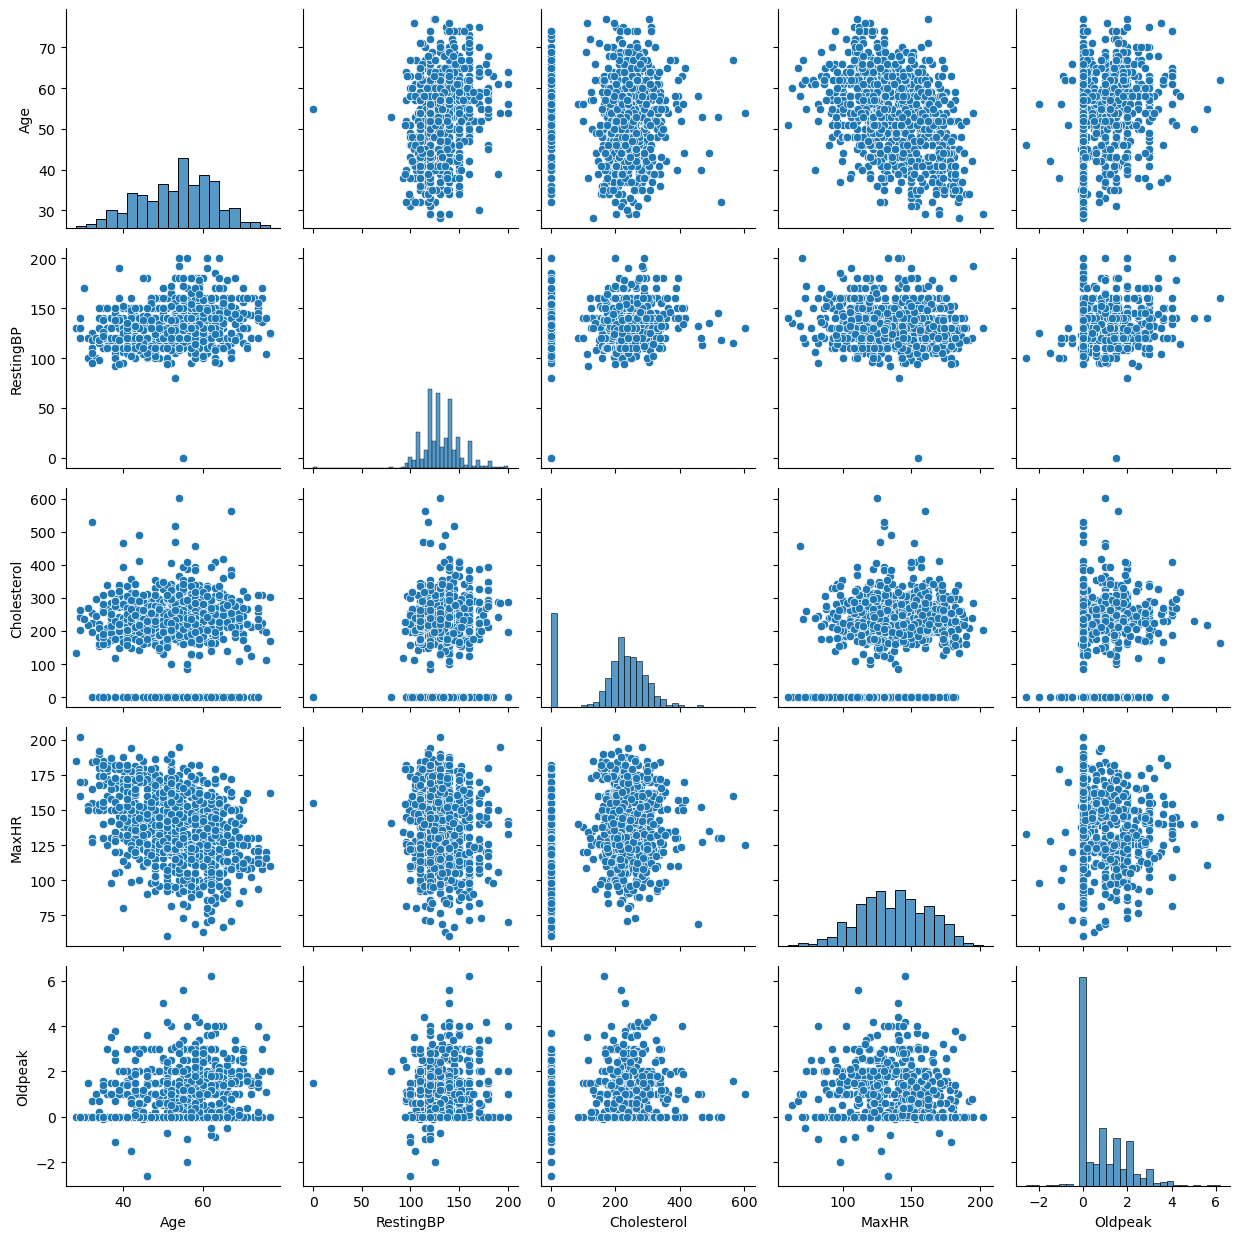

In [14]:
data_num = data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

sns.pairplot(data_num)
plt.tight_layout()
plt.show()

Now the same matrix will be displayed, but asigning a color to one of the two classes: it has heart disease or not. To do this, the *HeartDisease* attribute is converted to categorical and the classes are renamed: "Yes" if heart disease, "No" otherwise.

C:\Users\Alvaro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


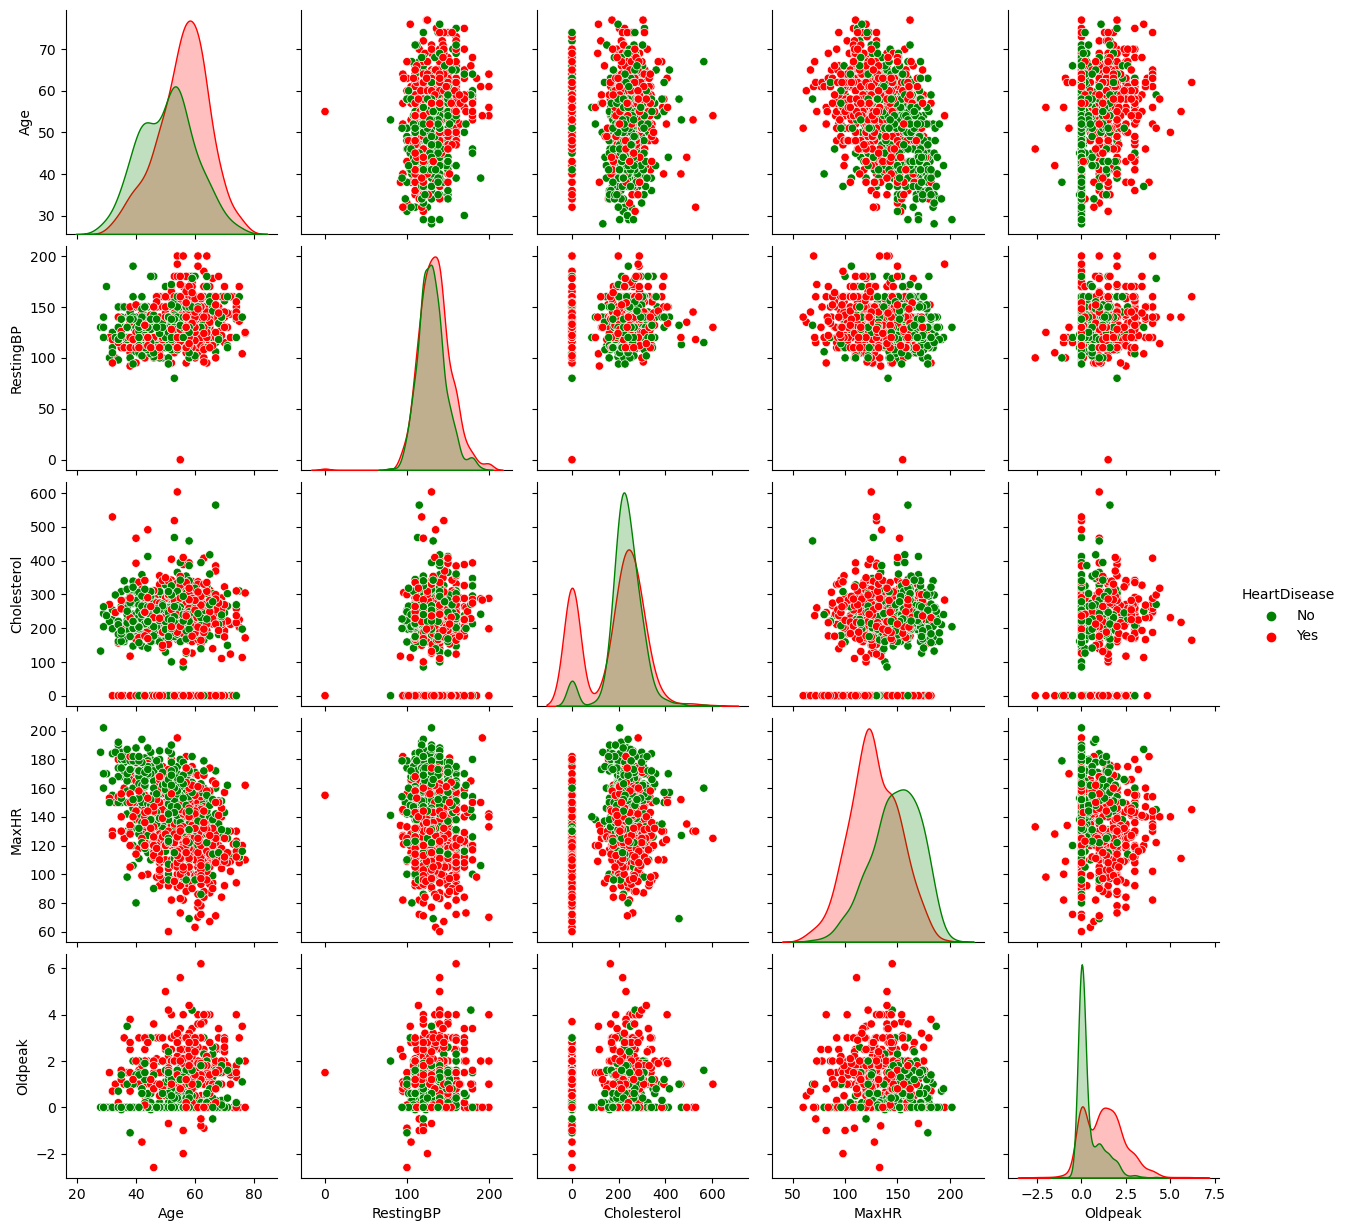

In [15]:
data['HeartDisease'] = data['HeartDisease'].astype(str)
data['HeartDisease'] = data['HeartDisease'].replace({'0': 'No', '1': 'Yes'})

sns.pairplot(data,
             vars = data_num,
             hue = 'HeartDisease',
             palette = {'No': 'green', 'Yes': 'red'})
plt.show()

The following conclusions can be drawn by looking below the diagonal:

- Older patients appears to be more likely to have heart disease than younger ones, although it is fairly distributed.
- When comparing *Age* with *MaxHR*, you can see how the red dots move to the right and down. That means than the older you are and the lower your heart rate is, the more likely you are to suffer from disease.
- Comparing *MaxHR* with *RestingBP*, makes it clear that healthy patients can achieve a higher heart rate.
- Regarding *Oldpeak*, it is observed how the patients without disease are distributed in the lower part.

We proceed to look for the correlations between the five numerical variables and *HeartDisease*. To do this, the matrix is built thanks to the `corr` function and the `heatmap` from `seaborn`.

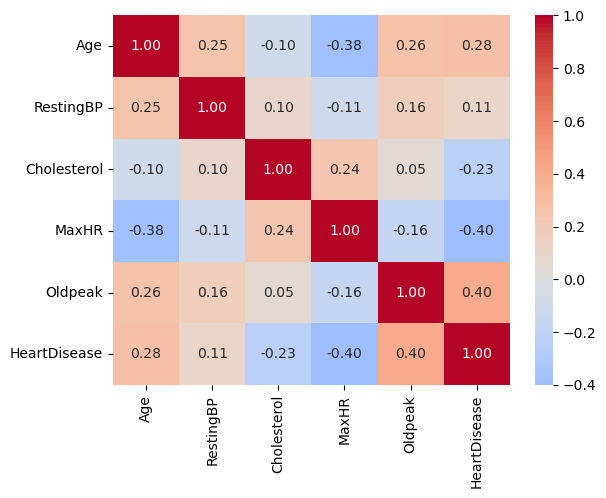

In [16]:
data['HeartDisease'] = data['HeartDisease'].replace({'No': 0, 'Yes': 1})
data_matrix = pd.concat([data_num, data['HeartDisease']], axis=1)

corr_data = data_matrix.corr()
sns.heatmap(corr_data, annot=True, center=0, fmt='.2f', cmap='coolwarm')
plt.show()

No significan correlation is observed between the five first variables. The highest is negative, of -0.38 between *Age* and *MaxHR*. And the lowest is 0.05 between *Cholesterol* and *Oldpeak*.

Since the correlations -excluing *HeartDisease*- are small or amlost null, these five attributes can be taken into account when creating a model.

With *HeartDisease*, the variables with which it is most correlated are *MaxHR* with a negative correlation (-0.40) and *Oldpeak* with a positive correlation (0.40), that is, they can contribute quite well to the prediction of a heart disease. The least correlated is *RestingBP* (0.11), and therefore may contribute little to modeling.

### 5.3. Qualitive variables <a id="Qualitative-variables"> </a>

To start with the qualitive variables, the distribution of *HeartDisease* classes -the target attribute- is visualized.

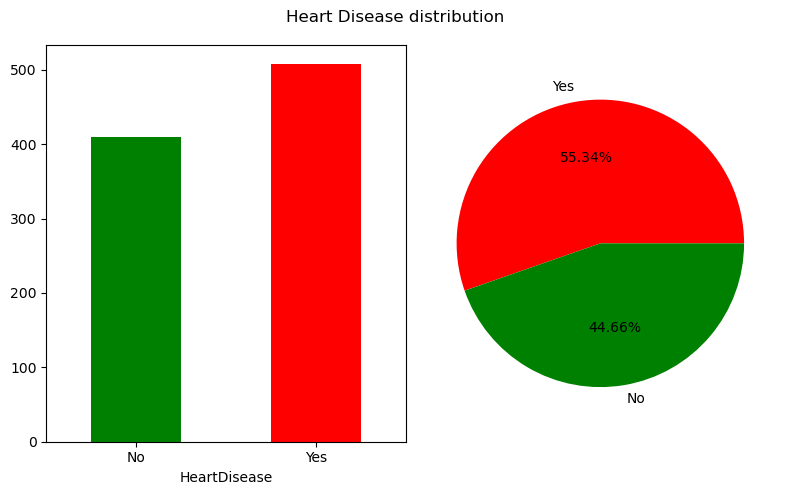

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,5))

data['HeartDisease'] = data['HeartDisease'].replace({0:'No', 1:'Yes'})

data['HeartDisease'].value_counts(sort=False).plot(kind = 'bar',
                                                   color = ['green', 'red'],
                                                   rot = 0,
                                                   ax = ax[0])
ax[1].pie(data['HeartDisease'].value_counts(), labels=['Yes', 'No'], autopct='%1.2f%%', colors=['red', 'green'])

plt.suptitle('Heart Disease distribution')
plt.tight_layout()
plt.show()

In [18]:
data['HeartDisease'].value_counts()

HeartDisease
Yes    508
No     410
Name: count, dtype: int64

About 44.66% of patients are healthy, and 55.34% are sick. The classes are quite balanced, so for this reason, during the training of the classification algorithms, there will be little chance of overfitting.

The rest of the qualitative are shown below according to the number of healthy and sick patients.

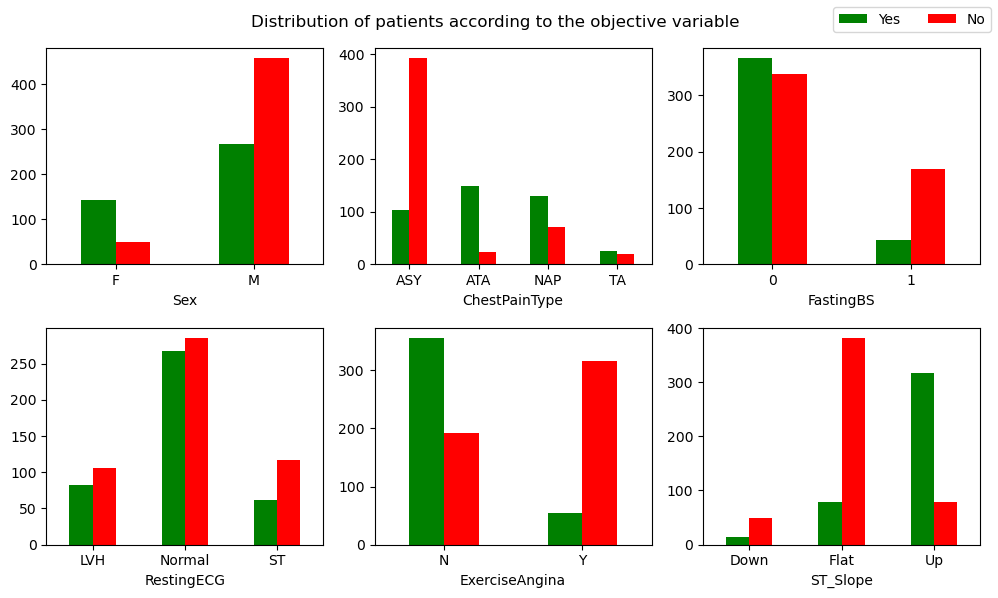

In [19]:
attributes = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,6))
ax = axes.flatten()
fig.suptitle('Distribution of patients according to the objective variable')

for index, attribute in enumerate(attributes):
    table = pd.crosstab(data[attribute], data['HeartDisease'])
    table.plot(kind='bar', ax=ax[index], color=['green','red'], rot=0)
    ax[index].get_legend().remove()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, ['Yes', 'No'], loc='upper right', ncol=4)

plt.tight_layout()
plt.show()

According to the bar graphs, the following general conclusions can be drawn:

- There is a higher percentage of sick men than women.
- Tha majority of patients with heart disease have an asymptomatic type of chest pain.
- Patients with heart disease approximately triple those without it when the fasting blood sugar is greater than 120 mm/dl.
- The variable with the most balance between the two *HeartDisease* classes is *RestingECG*, highlighting the differente in the ST class.
- There are many more sick than healthy patients with exercise-induced angina, and almost twice as many healthy patients without angina.
- The vast majority of sick patients have the slope of the peak exercise ST segment flat, and the majority of healthy patients have it up.

Based on these graphs, it appears that the three variables that would best help predict whether a patient has heart disease or not are *ChestPainType*, *ExerciseAngina* and *ST_Slope*.

<Axes: xlabel='RestingECG', ylabel='count'>

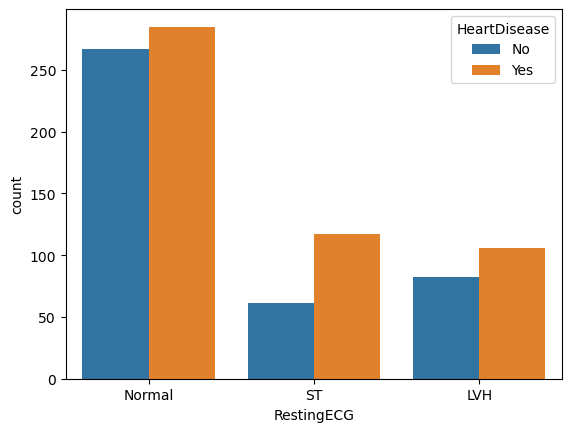

In [20]:
sns.countplot(data=data, x='RestingECG',hue='HeartDisease')

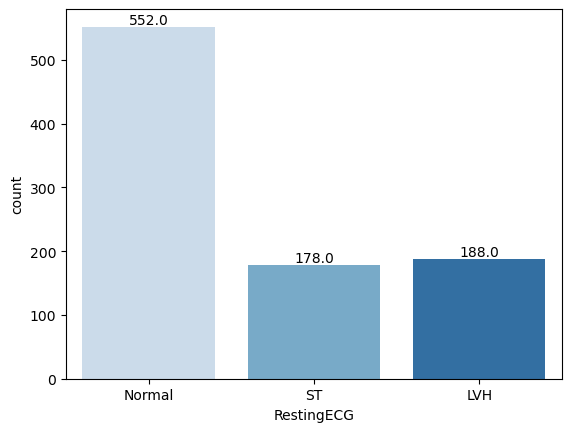

In [21]:
plot = sns.countplot(x = data['RestingECG'], palette='Blues')
for p in plot.patches:
    plot.annotate(p.get_height(), (p.get_x() + p.get_width() / 2.0, p.get_height()),
                  ha='center', va='center', xytext=(0,5), textcoords='offset points')

plt.show()

## 6. Data cleansing <a id="Data-cleansing"> </a>


### 6.1. Outliers detection and correction <a id="Outliers-detection-and-correction"> </a>

Outliers or extreme values are data that are significantly removed from the rest of the data. They can appear due to errors in measurement or storage and because they are "rare" values but are withing the range of acceptable values.

For each quantitative variable, the boxplot is displayed. Potential outliers will be accepted, removed or rejected using data imputation.

*Age*

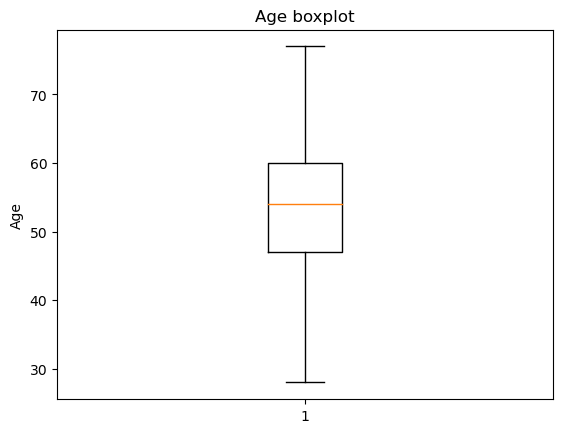

In [22]:
plt.boxplot(data["Age"])
plt.ylabel("Age")
plt.title("Age boxplot")
plt.show()

The *Age* variable is perfectly distributed. There are not outliers. 50% of the data is contained in the box (from 40 to 60 years or so). All patients are adults.

*RestingBP*

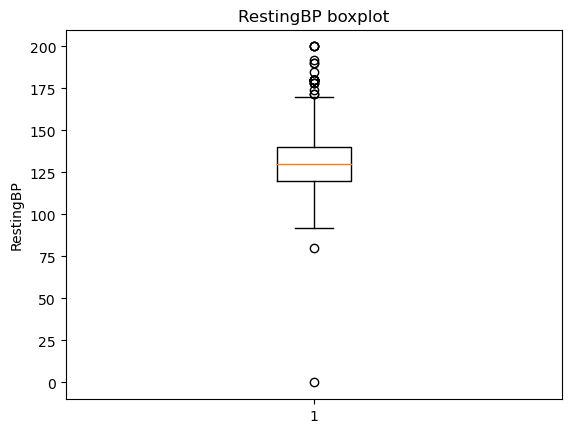

In [23]:
plt.boxplot(data["RestingBP"])
plt.ylabel("RestingBP")
plt.title("RestingBP boxplot")
plt.show()

50% of the *RestingBP* data is between 120 and 140 (the description at the beginning confirms this). There are extreme values above and below. The higher ones are within the acceptable range, since the resting blood pressure for cases of hypertensive crisis exceeds 180 mm Hg. Blood pressure below 90 mm Hg are considered low, and the closest outlier below is one of them. However, a resting blood pressure of 0 mm Hg is rare. It may be that this clinical feature was not measured or stored for that patients, or was a human error. It is verified that the point corresponds to a single sample:

In [24]:
len(data[data['RestingBP'] < 50])

1

Since it is only an observation, discarding it will hardly affect the results. Therefore, it is removed from the dataset:

In [25]:
data = data.drop(data[data.RestingBP < 50].index)

In [26]:
print(f"There are now {len(data)} samples")

There are now 917 samples


In [27]:
data = data.reset_index(drop=True)

*Cholesterol*

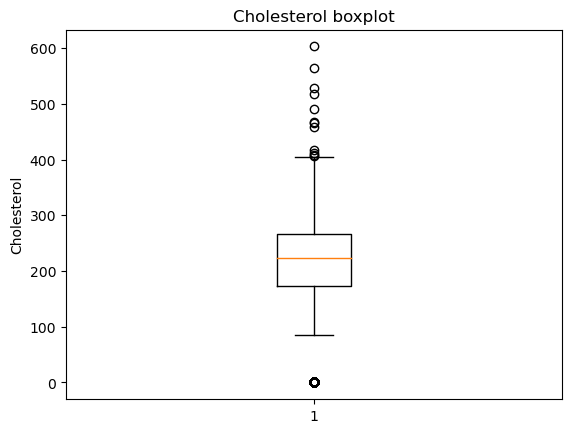

In [28]:
plt.boxplot(data["Cholesterol"])
plt.ylabel("Cholesterol")
plt.title("Cholesterol boxplot")
plt.show()

It seems that 50% of the cholesterol data is between approximately 170 and 270. There are extreme values above and below. The superiors are within the acceptable range. A very high value of cholesterol is very dangerous since the cells are not capable of absorbing it and the excess is deposited on the walls of the arteries, causing atherosclerosis and rish of heart attack.

However, a cholesterol level of 0 is impossible. There were a large number of 0s:

In [29]:
len(data[data['Cholesterol']==0])

171

It is a considerable amount: 18.64% of the instances. Eliminating all these observations would reduce the quality of the models and deleting the variable is also not an option, because this attribute theoretically has an effect of the presence of the disease. Therefore, the outliers must be replaced and new data will be imputed.

For the imputation, the *HeartDisease* class to which each observations with these outliers belongs will be taken into account.

First, the boxplots according to the class are observed:

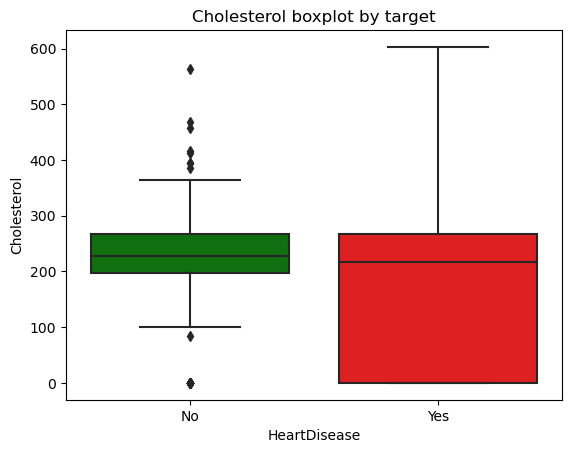

In [30]:
sns.boxplot(x=data['HeartDisease'],
            y=data['Cholesterol'],
            palette=['green','red'])
plt.title('Cholesterol boxplot by target')
plt.show()

The vast majority of outliers are from patients with heart disease, because the boxplot extends to 0. Specifically, the outliers of each class are:

In [31]:
chol_0_no = len(np.where((data.Cholesterol == 0) & (data.HeartDisease == 'No'))[0])
chol_0_yes = len(np.where((data.Cholesterol == 0) & (data.HeartDisease == 'Yes'))[0])
print("Outliers on Cholesterol:")
print("HeartDisease[No]: ", chol_0_no)
print("HeartDisease[Yes]: ", chol_0_yes)

Outliers on Cholesterol:
HeartDisease[No]:  20
HeartDisease[Yes]:  151


To resolve this, first, the mean of the *Cholesterol* variable for the two *HeartDisease* groups is calculated without taking into account the outliers to be imputed. They are then replaced by random values thanks to sample in a range of 20 mg/dl. That is, if X is the cholesterol mean of a group, the data that will replace the outliers will be in the range [X-10, X+10]. To do this, the *HeartDisease* levels are converted to 0 and 1. Then they are changed back.

A seed is introduced with `set.seed` so that when the cell is executed, the result are the same.

In [32]:
random.seed(42)

In [33]:
print("Mean Cholesterol without outliers of patients")

chol_no = np.where((data.Cholesterol != 0) & (data.HeartDisease == 'No'))[0]
chol_no_rows = data.iloc[chol_no]
chol_no_mean = chol_no_rows['Cholesterol'].mean()
print('Without heart disease: ', chol_no_mean)

chol_yes = np.where((data.Cholesterol != 0) & (data.HeartDisease == 'Yes'))[0]
chol_yes_rows = data.iloc[chol_yes]
chol_yes_mean = chol_yes_rows['Cholesterol'].mean()
print('With heart disease: ', chol_yes_mean)

Mean Cholesterol without outliers of patients
Without heart disease:  238.76923076923077
With heart disease:  251.06179775280899


To replace the outliers with a random value, it is used the `randint` method from `random`.

In [34]:
for i in range(len(data)):
    if data.iloc[i]['Cholesterol'] == 0:
        if data.iloc[i]['HeartDisease']=='No':
            data.loc[[i], 'Cholesterol'] = random.randint(int(chol_no_mean-10), int(chol_no_mean+10))
        if data.iloc[i]['HeartDisease']=='Yes':
            data.loc[[i], 'Cholesterol'] = random.randint(int(chol_yes_mean-10), int(chol_yes_mean+10))

In [35]:
# Now there are no outliers
chol_0_no_after = len(np.where((data.Cholesterol == 0) & (data.HeartDisease == 'No'))[0])
chol_0_yes_after = len(np.where((data.Cholesterol == 0) & (data.HeartDisease == 'Yes'))[0])
print("Outliers on Cholesterol After:")
print("HeartDisease[No]: ", chol_0_no_after)
print("HeartDisease[Yes]: ", chol_0_yes_after)

Outliers on Cholesterol After:
HeartDisease[No]:  0
HeartDisease[Yes]:  0


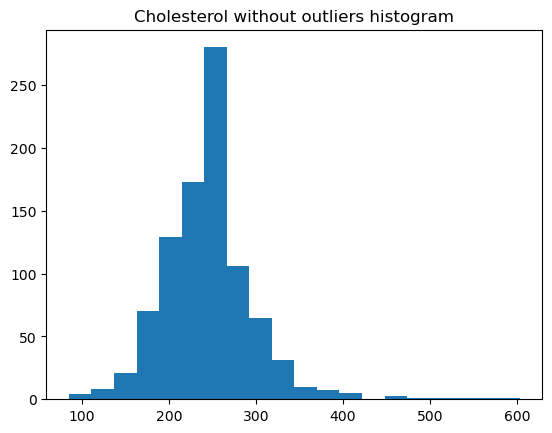

In [36]:
plt.hist(data['Cholesterol'], bins=20)
plt.title('Cholesterol without outliers histogram')
plt.show()

*MaxHR*

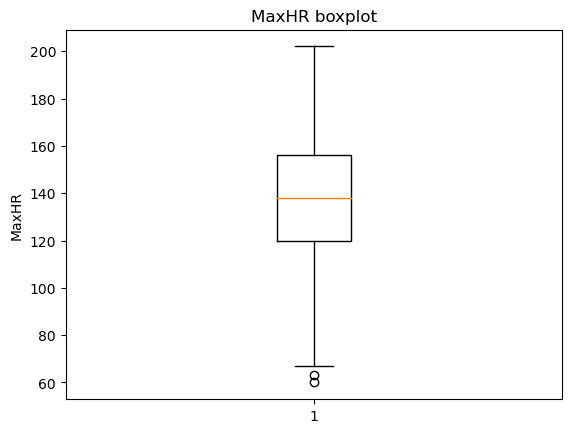

In [37]:
plt.boxplot(data["MaxHR"])
plt.ylabel("MaxHR")
plt.title("MaxHR boxplot")
plt.show()

50% of the *MaxHR* data is between 120 and 156. There are some extreme values below. That is, the minimum rate reached by these patients is around 60. They are special cases, but real, probably with heart problems. This characteristic could be calculated by substracting the age from 220. Knowing that the maximum age of the dataset is 77 years, your normal *MaxHR* shoul be 220-77 = 143 beats per minute.

*RestingBP*

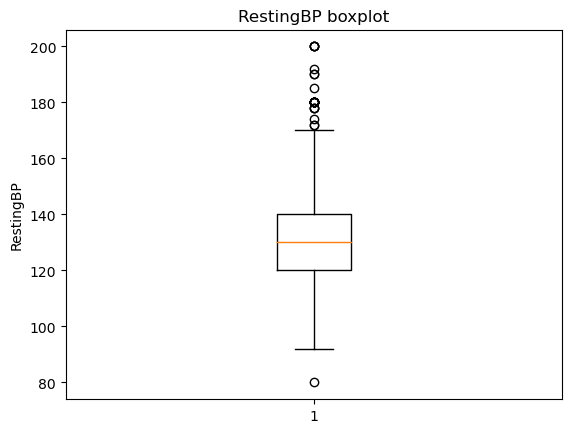

In [38]:
plt.boxplot(data["RestingBP"])
plt.ylabel("RestingBP")
plt.title("RestingBP boxplot")
plt.show()

50% of the *Oldpeak* data is between 0 and 1.5. These are extreme values above and below. But all of them are within the acceptable range since the ST depression induced by exercise in relation to rest can reach these values.

### 6.2. One Hot Encoding <a id="One-Hot-Encoding"> </a>

The one hot encoding technique is used to represent categorical variables in numerical values so they can be used in some machine learning models.

The five non-discretized independent qualitative variables will be one hot encoded. To do it, a new column of 0s and 1s will be created for each label. Records with 0 will not have that label, while records with 1 will.

In [39]:
data['HeartDisease'] = data['HeartDisease'].replace({'No':0, 'Yes':1})
data_encoded = pd.get_dummies(data, drop_first=True, dtype=int)
data_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


### 6.3. Normalization <a id="Normalization"> </a>

The quantitative variables are then normalized to the same scale so that in the models none has more weight than the other. Difference normalization is used to place values between 0 and 1 by means of a function thanks to the `MinMaxScaler` function. Then the new fields are created with the normalized values.

In [40]:
scaler = preprocessing.MinMaxScaler()

data_encoded_num = data_encoded[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
data_encoded[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] = scaler.fit_transform(data_encoded_num)
data_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.500000,0.393822,0,0.788732,0.295455,0,1,1,0,0,1,0,0,0,1
1,0.428571,0.666667,0.183398,0,0.676056,0.409091,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.416667,0.382239,0,0.267606,0.295455,0,1,1,0,0,0,1,0,0,1
3,0.408163,0.483333,0.249035,0,0.338028,0.465909,1,0,0,0,0,1,0,1,1,0
4,0.530612,0.583333,0.212355,0,0.436620,0.295455,0,1,0,1,0,1,0,0,0,1


The final dataset is made up of 16 variables. The five normalized, the two binaries *FastingBS* and *HeartDisease* and the nine dummy variables.

## 7. Models creation <a id="Models-creation"> </a>

The data is separated into the training set and the test set. The first will be used to fit the data of the models and the second to evaluate them.

In [41]:
X = data_encoded.drop(['HeartDisease'], axis=1)
y = data_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**Feature selection**

The training and test data above contain all the input features, but there may be some that are not important for predicting the presence of heart disease. In the EDA we have already seen which variables can have more effect on the target variable and which cannot. But, to check this, the `f_classif` method of `feature_selection` is used and the F value and p-value are returned. The higher F and the smaller p, the more important the characteristic is over *Heart Disease*.

In [58]:
F, p = feature_selection.f_classif(X_train, y_train)

pd.DataFrame(([F, p]), columns= X_train.columns, index=['F_value', 'p_value']).T

,F_value,p_value
Age,43.545914,7.952629e-11
RestingBP,8.268134,4.152015e-03
Cholesterol,4.818083,2.847639e-02
FastingBS,57.181348,1.194512e-13
MaxHR,138.385479,2.215614e-29
Oldpeak,120.597294,4.486788e-26
Sex_M,69.492542,3.795161e-16
ChestPainType_ATA,136.163938,5.682469e-29
ChestPainType_NAP,36.824959,2.073930e-09
ChestPainType_TA,2.804917,9.440341e-02


Characteristics that have F value greater than 40 will be selected. Although the two types of chest pain NAP and TA do not achieve it, they are also selected because the types ATA and ASY (included as 0) do have a large F value.

In [59]:
X_train_rel = X_train.drop(['RestingBP', 'Cholesterol',
                            'RestingECG_Normal', 'RestingECG_ST'], axis=1)
X_test_rel = X_test.drop(['RestingBP', 'Cholesterol',
                            'RestingECG_Normal', 'RestingECG_ST'], axis=1)

In [60]:
X_train_rel.head()

,Age,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
161,0.428571,0,0.253521,0.295455,1,0,0,0,1,1,0
603,0.816327,1,0.640845,0.295455,1,0,1,0,1,0,1
658,0.632653,1,0.521127,0.545455,1,0,1,0,0,1,0
792,0.795918,1,0.725352,0.318182,1,0,0,0,0,1,0
140,0.489796,0,0.239437,0.579545,1,0,0,0,1,1,0


In [61]:
y_train.head()

161    1
603    0
658    1
792    1
140    1
Name: HeartDisease, dtype: int64

The `confusion_matrix_and_roc_curve` function will show the normalized and not normalized confusion matrices and the ROC curve given the model, the real test samples of the output variable and the predicted ones.

In [71]:
def confusion_matrix_and_roc_curve(model, X_test, y_test):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,
                                          cmap='Blues', ax=ax[0])
    ax[0].set_title("Confusion matrix without normalization")
    
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,
                                          normalize='true', cmap='Blues',
                                          values_format='.2%', ax=ax[1])
    ax[1].set_title("Normalized confusion matrix")
    
    plt.tight_layout()
    plt.show()
    
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title("ROC curve")
    plt.show()

The `scores` function will return a dataframe with the accuracy, precision, recall and F1 scores of the model evaluation with the test set.

In [75]:
def scores(y_test, y_pred, y_pred_proba):
    scores = {"Test scores": {"Accuracy": round(accuracy_score(y_test, y_pred)*100, 2),
                              "Precision": round(precision_score(y_test, y_pred)*100, 2),
                              "Recall": round(recall_score(y_test, y_pred)*100, 2),
                              "F1": round(f1_score(y_test, y_pred)*100, 2),
                              "AUC": round(roc_auc_score(y_test, y_pred_proba)*100, 2)}}
    
    return pd.DataFrame(scores)

For all techniques, hyperparameter tuning will be performed with the `GridSearchCV` function with cross-validation to obtain the best combination of parameters. One of them is `scoring` which is the metric that will be tried to maximize during cross-validation in the validation test. In this case, the positive class are the patients who have heart disease and the negative class are those who don't. As it is preferable to correctly classify sick patients, preference will be given to sensitivity or recall, but in some models the default metric will be left, which is accuracy or f1, depending on the results.

### Logictic Regression <a id="lr"> </a>

#### Model with all variables

In [76]:
param_grid = {"penalty": ['l1', 'l2'],
              "C": [0.001, 0.01, 1, 10, 100]}

model_lr_all = LogisticRegression(solver='liblinear', random_state=42)
model_lr_all = GridSearchCV(model_lr_all,
                            param_grid=param_grid,
                            cv=5)

model_lr_all.fit(X_train, y_train)
model_lr_all.best_params_

{'C': 1, 'penalty': 'l2'}

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

           Test scores
AUC              93.60
Accuracy         88.59
F1               89.86
Precision        88.57
Recall           91.18


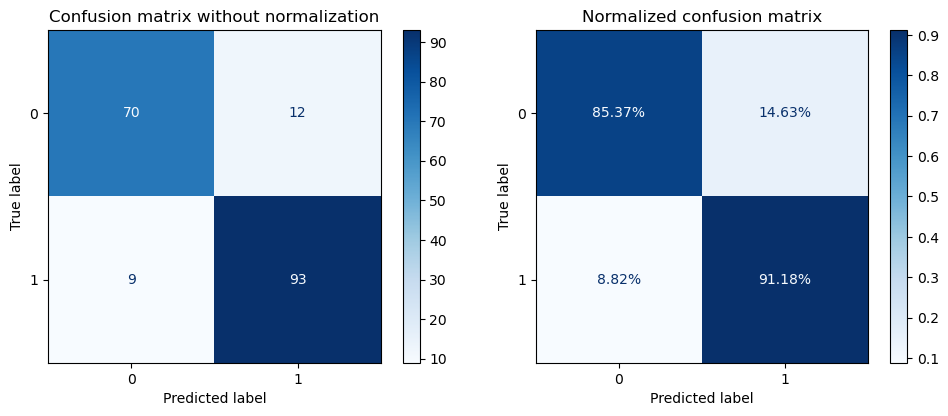

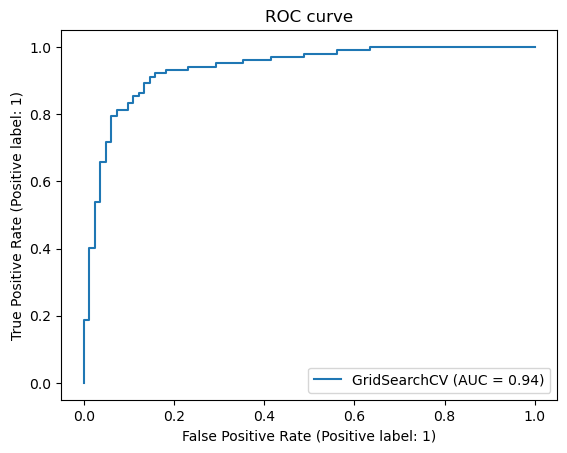

In [77]:
# Predictions
y_pred = model_lr_all.predict(X_test)
y_pred_proba = model_lr_all.predict_proba(X_test)[::,1]

# Classification report
print(classification_report(y_test, y_pred))

# Test scores
model_lr_all_scores = scores(y_test, y_pred, y_pred_proba)
print(model_lr_all_scores)

# Confusion matrix and roc curve
confusion_matrix_and_roc_curve(model_lr_all, X_test, y_test)

#### Model with important variables

In [78]:
param_grid = {"penalty": ['l1', 'l2'],
              "C": [0.001, 0.01, 1, 10, 100]}

model_lr_rel = LogisticRegression(solver='liblinear', random_state=42)
model_lr_rel = GridSearchCV(model_lr_rel,
                            param_grid=param_grid,
                            cv=5)

model_lr_rel.fit(X_train_rel, y_train)
model_lr_rel.best_params_

{'C': 1, 'penalty': 'l2'}

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        82
           1       0.88      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

           Test scores
AUC              94.13
Accuracy         88.04
F1               89.42
Precision        87.74
Recall           91.18


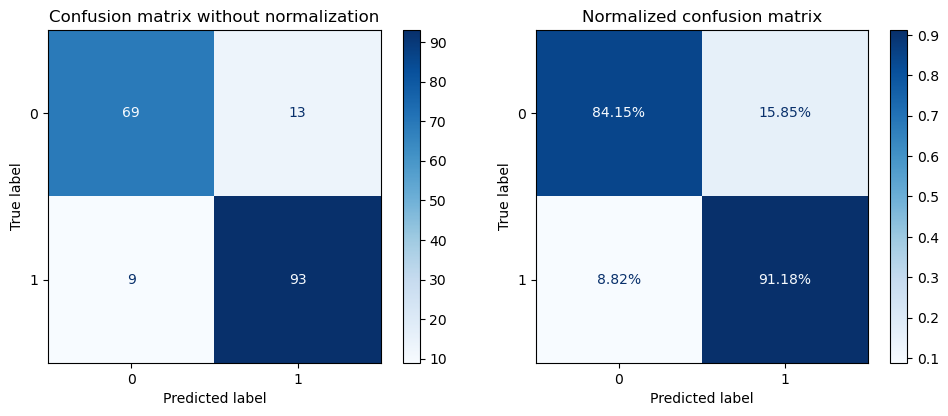

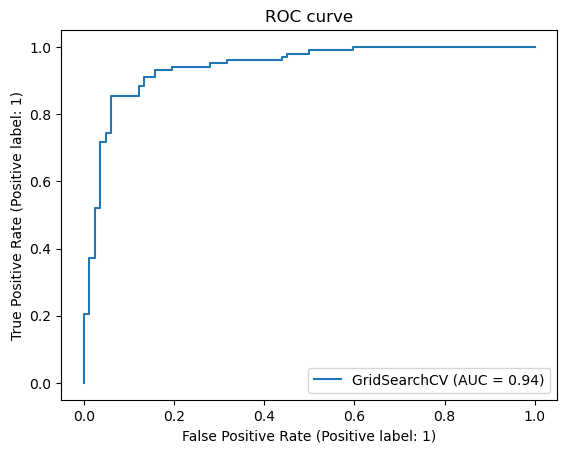

In [79]:
# Predictions
y_pred = model_lr_rel.predict(X_test_rel)
y_pred_proba = model_lr_rel.predict_proba(X_test_rel)[::,1]

# Classification report
print(classification_report(y_test, y_pred))

# Test scores
model_lr_rel_scores = scores(y_test, y_pred, y_pred_proba)
print(model_lr_rel_scores)

# Confusion matrix and roc curve
confusion_matrix_and_roc_curve(model_lr_rel, X_test_rel, y_test)

### Support Vector Machines  <a id="svm"> </a>

#### Model with all variables

In [80]:
param_grid = {"C": [0.01, 0.1, 1, 10, 50, 100, 200],
              "gamma": [0.001, 0.01, 0.1, 1, 10]}
model_svm_all = GridSearchCV(SVC(kernel = 'rbf',
                                 random_state = 42,
                                 probability = True),
                             param_grid = param_grid,
                             cv = 5)
model_svm_all.fit(X_train, y_train)
model_svm_all.best_params_

{'C': 10, 'gamma': 0.1}

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        82
           1       0.85      0.91      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184

           Test scores
AUC              93.02
Accuracy         85.87
F1               87.74
Precision        84.55
Recall           91.18


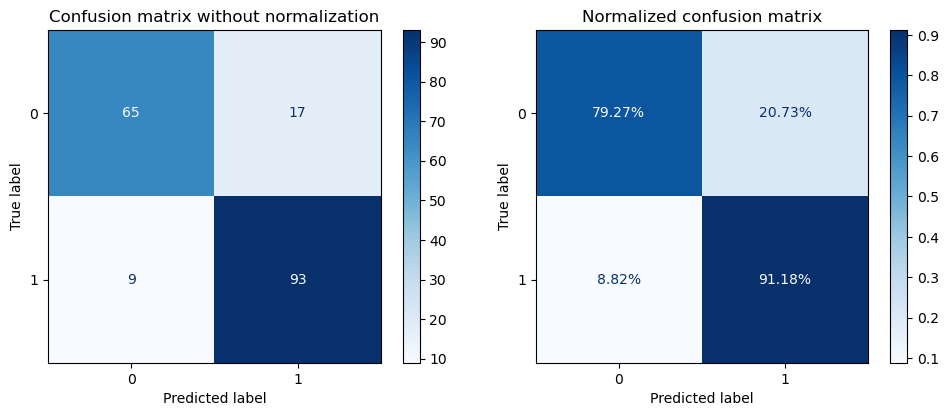

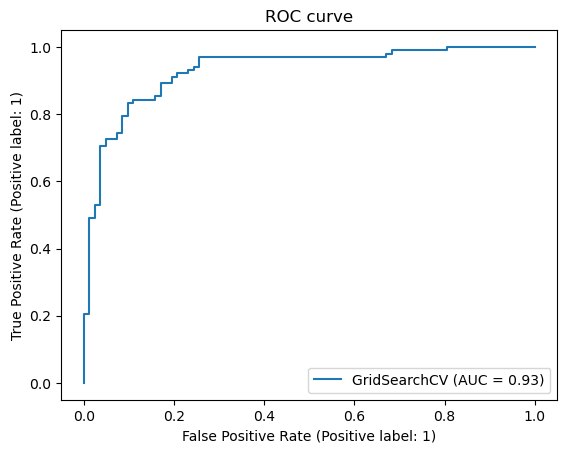

In [81]:
# Predictions
y_pred = model_svm_all.predict(X_test)
y_pred_proba = model_svm_all.predict_proba(X_test)[::,1]

# Classification report
print(classification_report(y_test, y_pred))

# Test scores
model_svm_all_scores = scores(y_test, y_pred, y_pred_proba)
print(model_svm_all_scores)

# Confusion matrix and roc curve
confusion_matrix_and_roc_curve(model_svm_all, X_test, y_test)

#### Model with important variables

In [83]:
param_grid = {"C": [0.01, 0.1, 1, 10, 50, 100, 200],
              "gamma": [0.001, 0.01, 0.1, 1, 10]}
model_svm_rel = GridSearchCV(SVC(kernel = 'rbf',
                                 random_state = 42,
                                 probability = True),
                             param_grid = param_grid,
                             cv = 5)
model_svm_rel.fit(X_train_rel, y_train)
model_svm_rel.best_params_

{'C': 1, 'gamma': 1}

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        82
           1       0.85      0.91      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184

           Test scores
AUC              89.65
Accuracy         85.87
F1               87.74
Precision        84.55
Recall           91.18


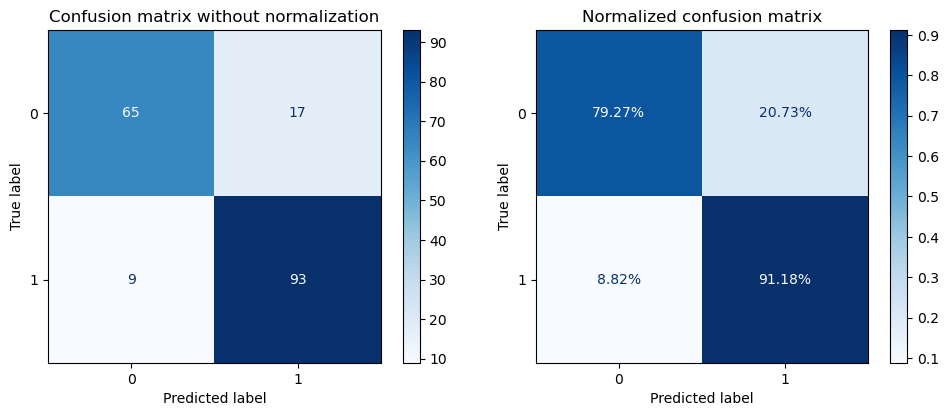

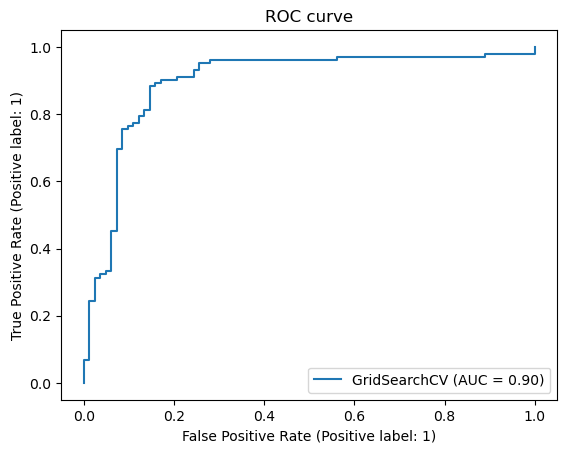

In [84]:
# Predictions
y_pred = model_svm_rel.predict(X_test_rel)
y_pred_proba = model_svm_rel.predict_proba(X_test_rel)[::,1]

# Classification report
print(classification_report(y_test, y_pred))

# Test scores
model_svm_rel_scores = scores(y_test, y_pred, y_pred_proba)
print(model_svm_rel_scores)

# Confusion matrix and roc curve
confusion_matrix_and_roc_curve(model_svm_rel, X_test_rel, y_test)

### K-Nearest Neighbors  <a id="knn"> </a>

#### Model with all variables

In [85]:
param_grid = {"n_neighbors": list(range(1,11)),
              "weights": ['uniform', 'distance']}
model_knn_all = GridSearchCV(KNeighborsClassifier(),
                             param_grid = param_grid,
                             scoring = 'recall',
                             cv = 5)
model_knn_all.fit(X_train, y_train)
model_knn_all.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

           Test scores
AUC              92.54
Accuracy         89.13
F1               90.29
Precision        89.42
Recall           91.18


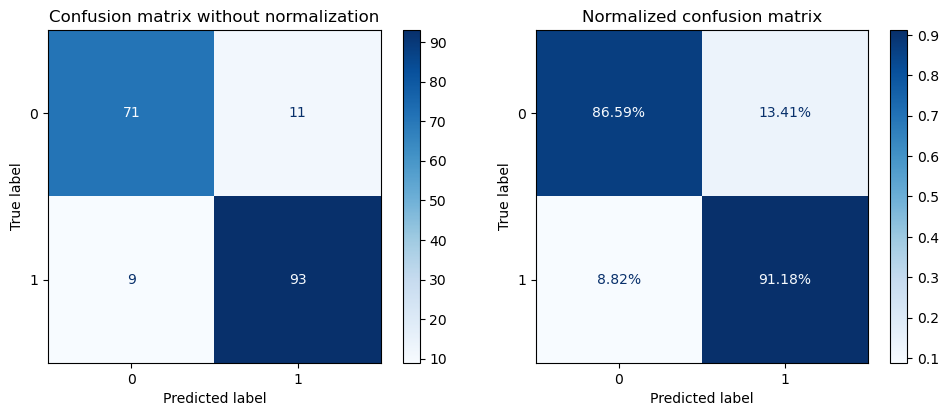

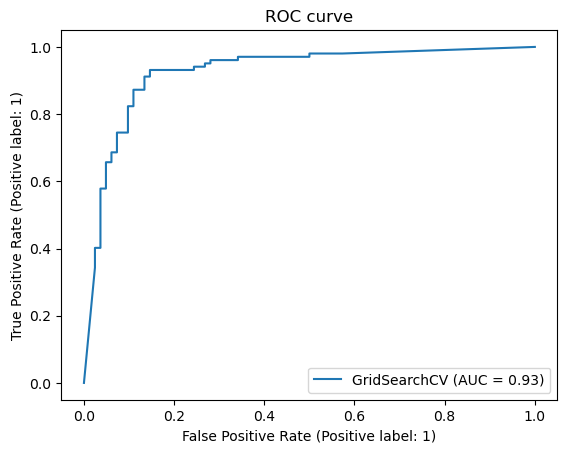

In [86]:
# Predictions
y_pred = model_knn_all.predict(X_test)
y_pred_proba = model_knn_all.predict_proba(X_test)[::,1]

# Classification report
print(classification_report(y_test, y_pred))

# Test scores
model_knn_all_scores = scores(y_test, y_pred, y_pred_proba)
print(model_knn_all_scores)

# Confusion matrix and roc curve
confusion_matrix_and_roc_curve(model_knn_all, X_test, y_test)

#### Model with important variables

In [87]:
param_grid = {"n_neighbors": list(range(1,11)),
              "weights": ['uniform', 'distance']}
model_knn_rel = GridSearchCV(KNeighborsClassifier(),
                             param_grid = param_grid,
                             scoring = 'recall',
                             cv = 5)
model_knn_rel.fit(X_train_rel, y_train)
model_knn_rel.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        82
           1       0.87      0.90      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

           Test scores
AUC              91.53
Accuracy         86.96
F1               88.46
Precision        86.79
Recall           90.20


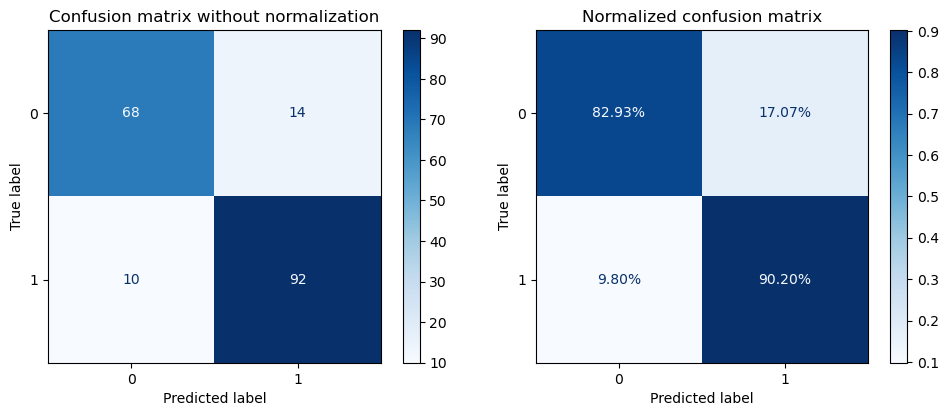

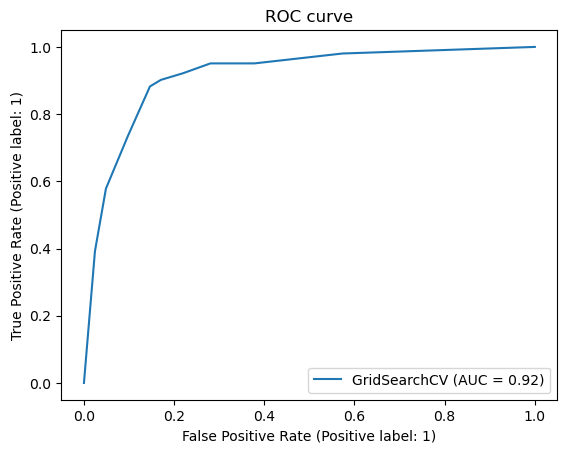

In [88]:
# Predictions
y_pred = model_knn_rel.predict(X_test_rel)
y_pred_proba = model_knn_rel.predict_proba(X_test_rel)[::,1]

# Classification report
print(classification_report(y_test, y_pred))

# Test scores
model_knn_rel_scores = scores(y_test, y_pred, y_pred_proba)
print(model_knn_rel_scores)

# Confusion matrix and roc curve
confusion_matrix_and_roc_curve(model_knn_rel, X_test_rel, y_test)

### Decision Tree <a id="dt"> </a>

#### Model with all variables

In [89]:
param_grid = {"max_depth": [4, 6, 8, 10, 12],
              "min_samples_split": [2, 4, 6, 8, 10],
              "max_features": [2, 3, 4],
              "min_samples_leaf": [1, 2]}
model_dt_all = GridSearchCV(DecisionTreeClassifier(random_state=42),
                             param_grid = param_grid,
                             scoring = 'recall',
                             cv = 5)
model_dt_all.fit(X_train, y_train)
model_dt_all.best_params_

{'max_depth': 4,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        82
           1       0.75      0.89      0.82       102

    accuracy                           0.78       184
   macro avg       0.79      0.76      0.77       184
weighted avg       0.78      0.78      0.77       184

           Test scores
AUC              87.98
Accuracy         77.72
F1               81.61
Precision        75.21
Recall           89.22


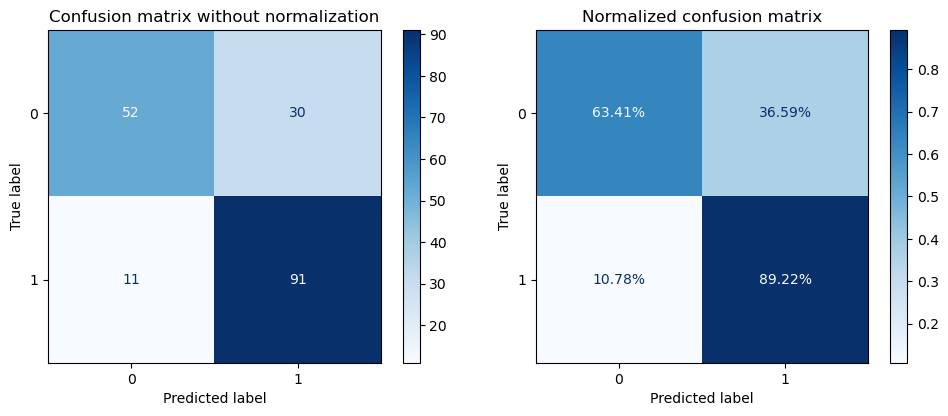

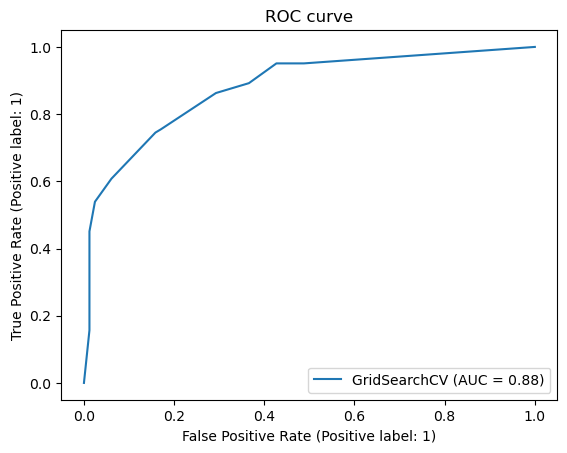

In [90]:
# Predictions
y_pred = model_dt_all.predict(X_test)
y_pred_proba = model_dt_all.predict_proba(X_test)[::,1]

# Classification report
print(classification_report(y_test, y_pred))

# Test scores
model_dt_all_scores = scores(y_test, y_pred, y_pred_proba)
print(model_dt_all_scores)

# Confusion matrix and roc curve
confusion_matrix_and_roc_curve(model_dt_all, X_test, y_test)

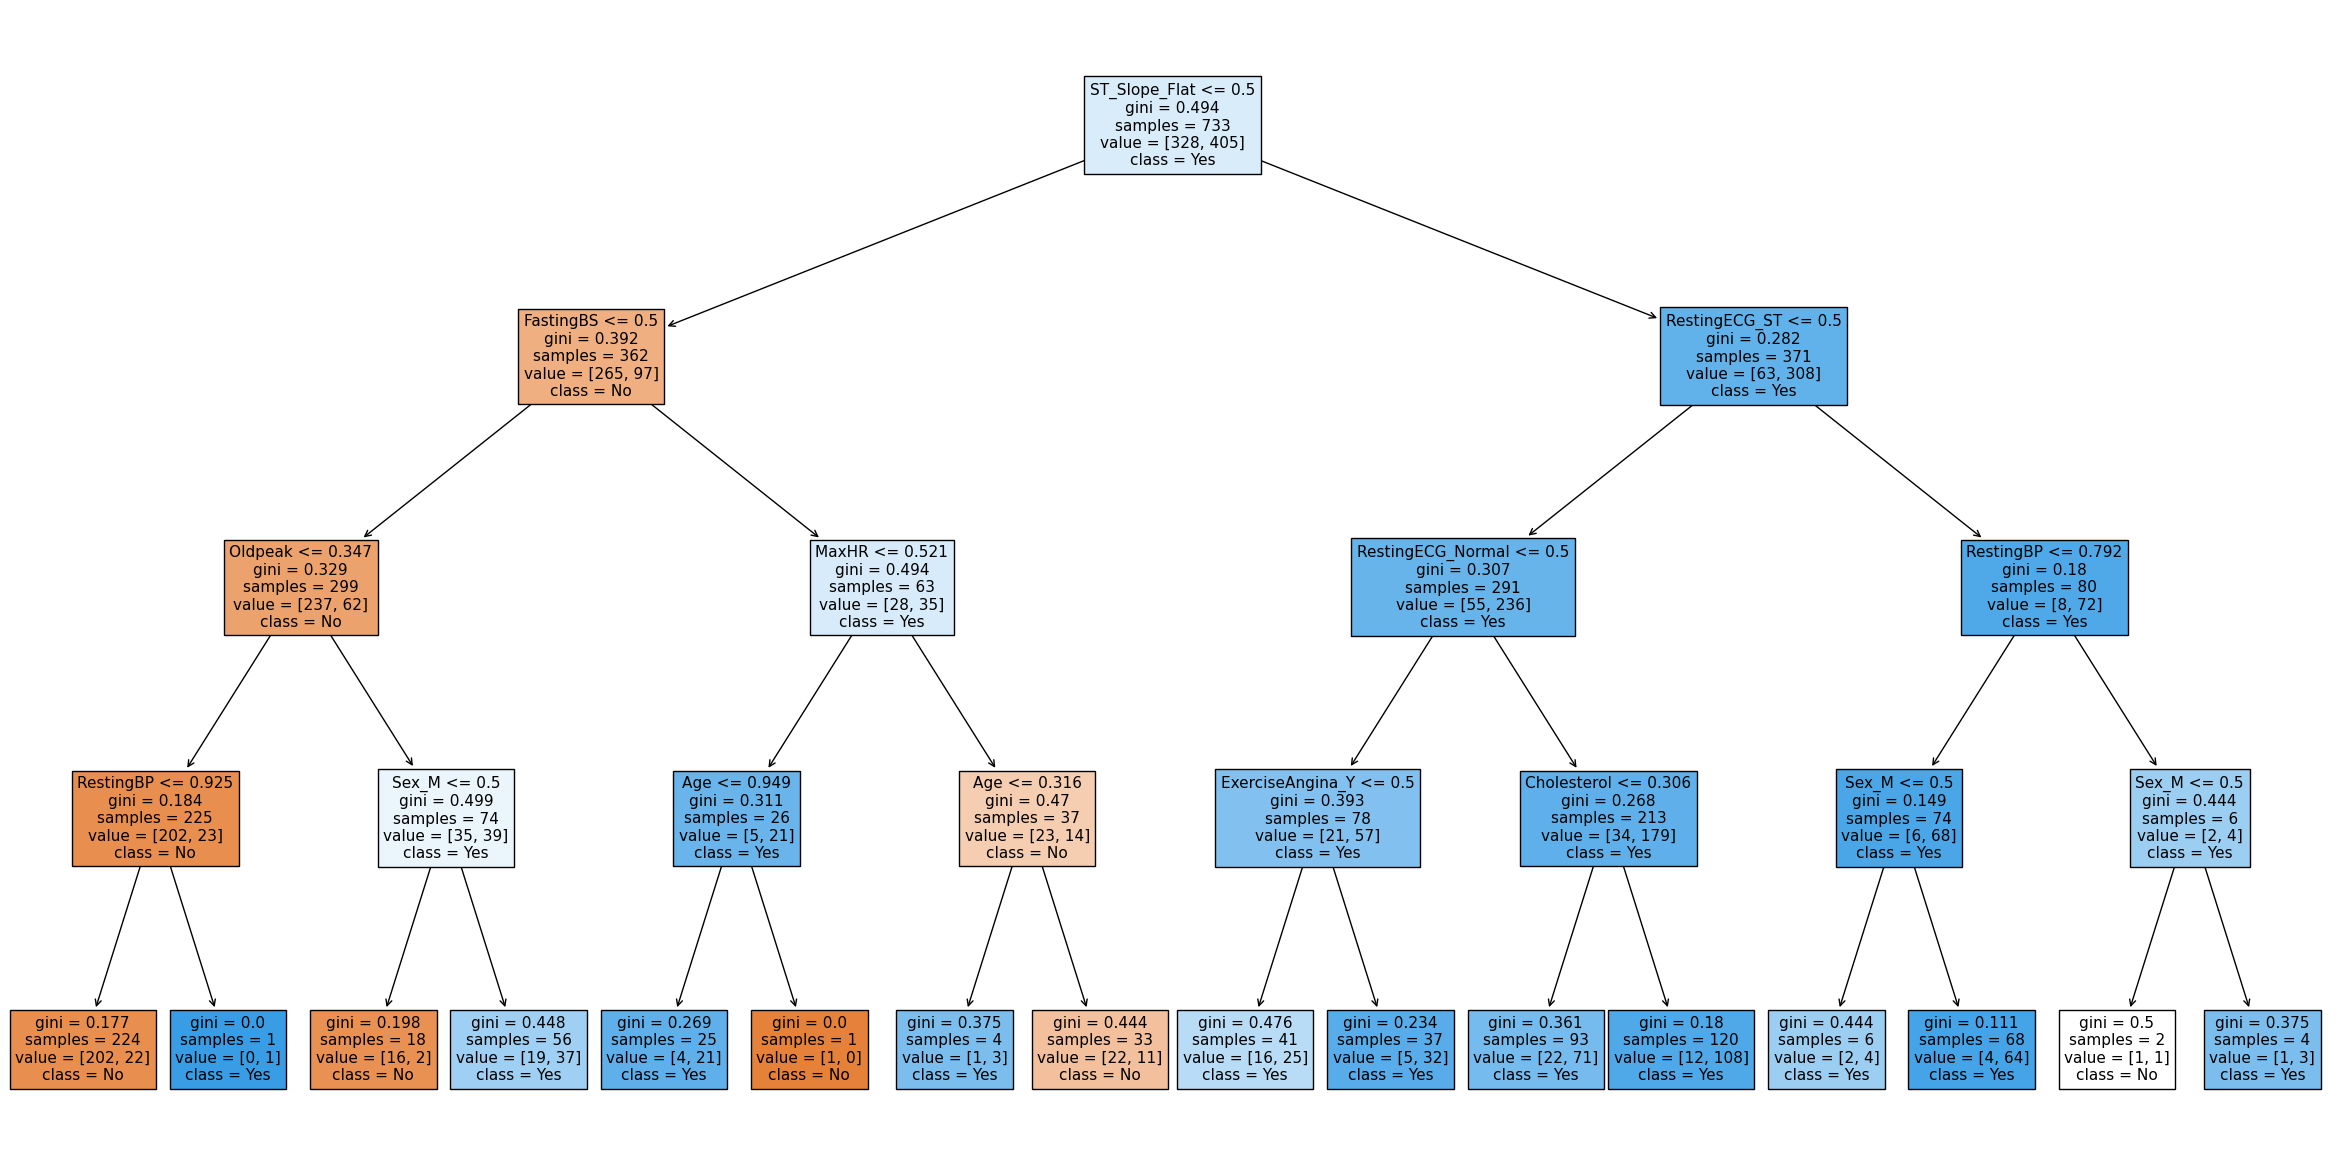

In [98]:
# The best model is trained
model_dt_all = DecisionTreeClassifier(max_depth=4,
                                      min_samples_split=6,
                                      min_samples_leaf=1,
                                      max_features=2,
                                      random_state=42)
model_dt_all.fit(X_train, y_train)

# Plot tree
fig = plt.figure(figsize=(30,15))
_ = tree.plot_tree(model_dt_all,
                   feature_names = X_train.columns.tolist(),
                   class_names = ["No", "Yes"],
                   filled = True,
                   fontsize = 11)

In the decision tree, strong colors make a bigger difference between the two *HeartDisease* classes. The orange indicate that the majority class belongs to healthy patients and the blue ones to sick patients.

The root node of the decision tree uses the *ST_Slope_Flat* variable to diverge into two paths. If the feature is less than or equal to 0.5 to the left, and to the right otherwise. So that variable is important in the model, as we see below in the feature importance graph.

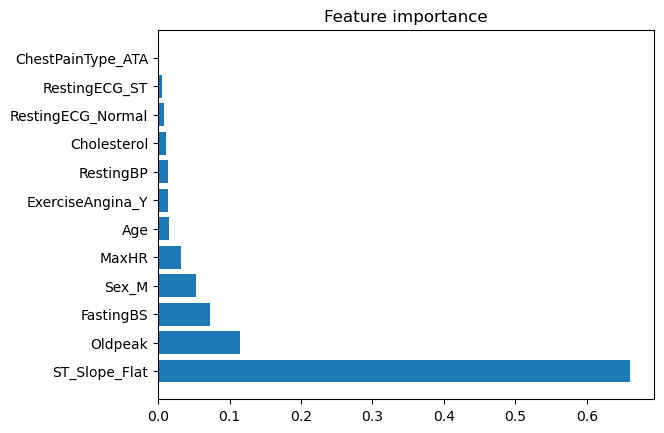

In [101]:
# Feature importance
model_dt_all_imp = sorted(zip(model_dt_all.feature_importances_, X_train.columns), reverse=True)
model_dt_all_imp = dict(model_dt_all_imp)

plt.barh(list(model_dt_all_imp.values()), list(model_dt_all_imp.keys()))
plt.title("Feature importance")
plt.show()

#### Model with important variables

In [102]:
param_grid = {"max_depth": [4, 6, 8, 10, 12],
              "min_samples_split": [2, 4, 6, 8, 10],
              "max_features": [2, 3, 4],
              "min_samples_leaf": [1, 2]}
model_dt_rel = GridSearchCV(DecisionTreeClassifier(random_state=42),
                             param_grid = param_grid,
                             scoring = 'recall',
                             cv = 5)
model_dt_rel.fit(X_train_rel, y_train)
model_dt_rel.best_params_

{'max_depth': 4,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 8}

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        82
           1       0.83      0.83      0.83       102

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184

           Test scores
AUC              89.89
Accuracy         80.98
F1               82.93
Precision        82.52
Recall           83.33


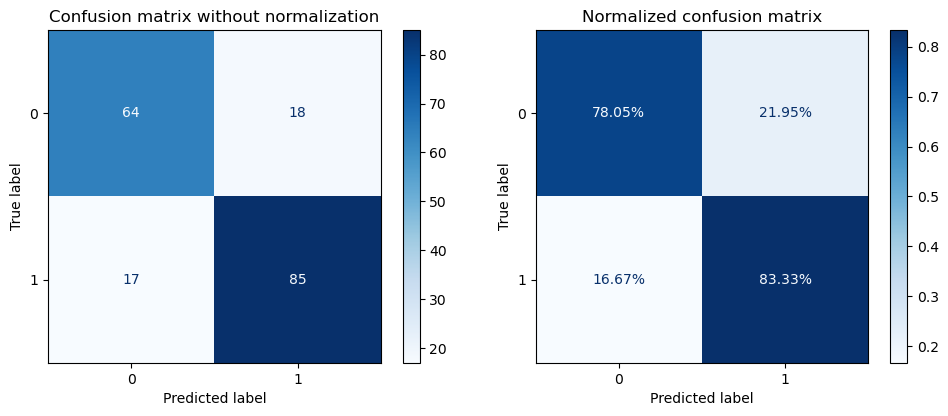

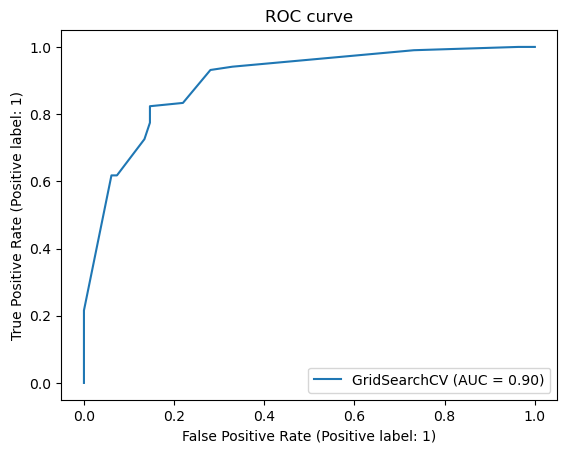

In [103]:
# Predictions
y_pred = model_dt_rel.predict(X_test_rel)
y_pred_proba = model_dt_rel.predict_proba(X_test_rel)[::,1]

# Classification report
print(classification_report(y_test, y_pred))

# Test scores
model_dt_rel_scores = scores(y_test, y_pred, y_pred_proba)
print(model_dt_rel_scores)

# Confusion matrix and roc curve
confusion_matrix_and_roc_curve(model_dt_rel, X_test_rel, y_test)

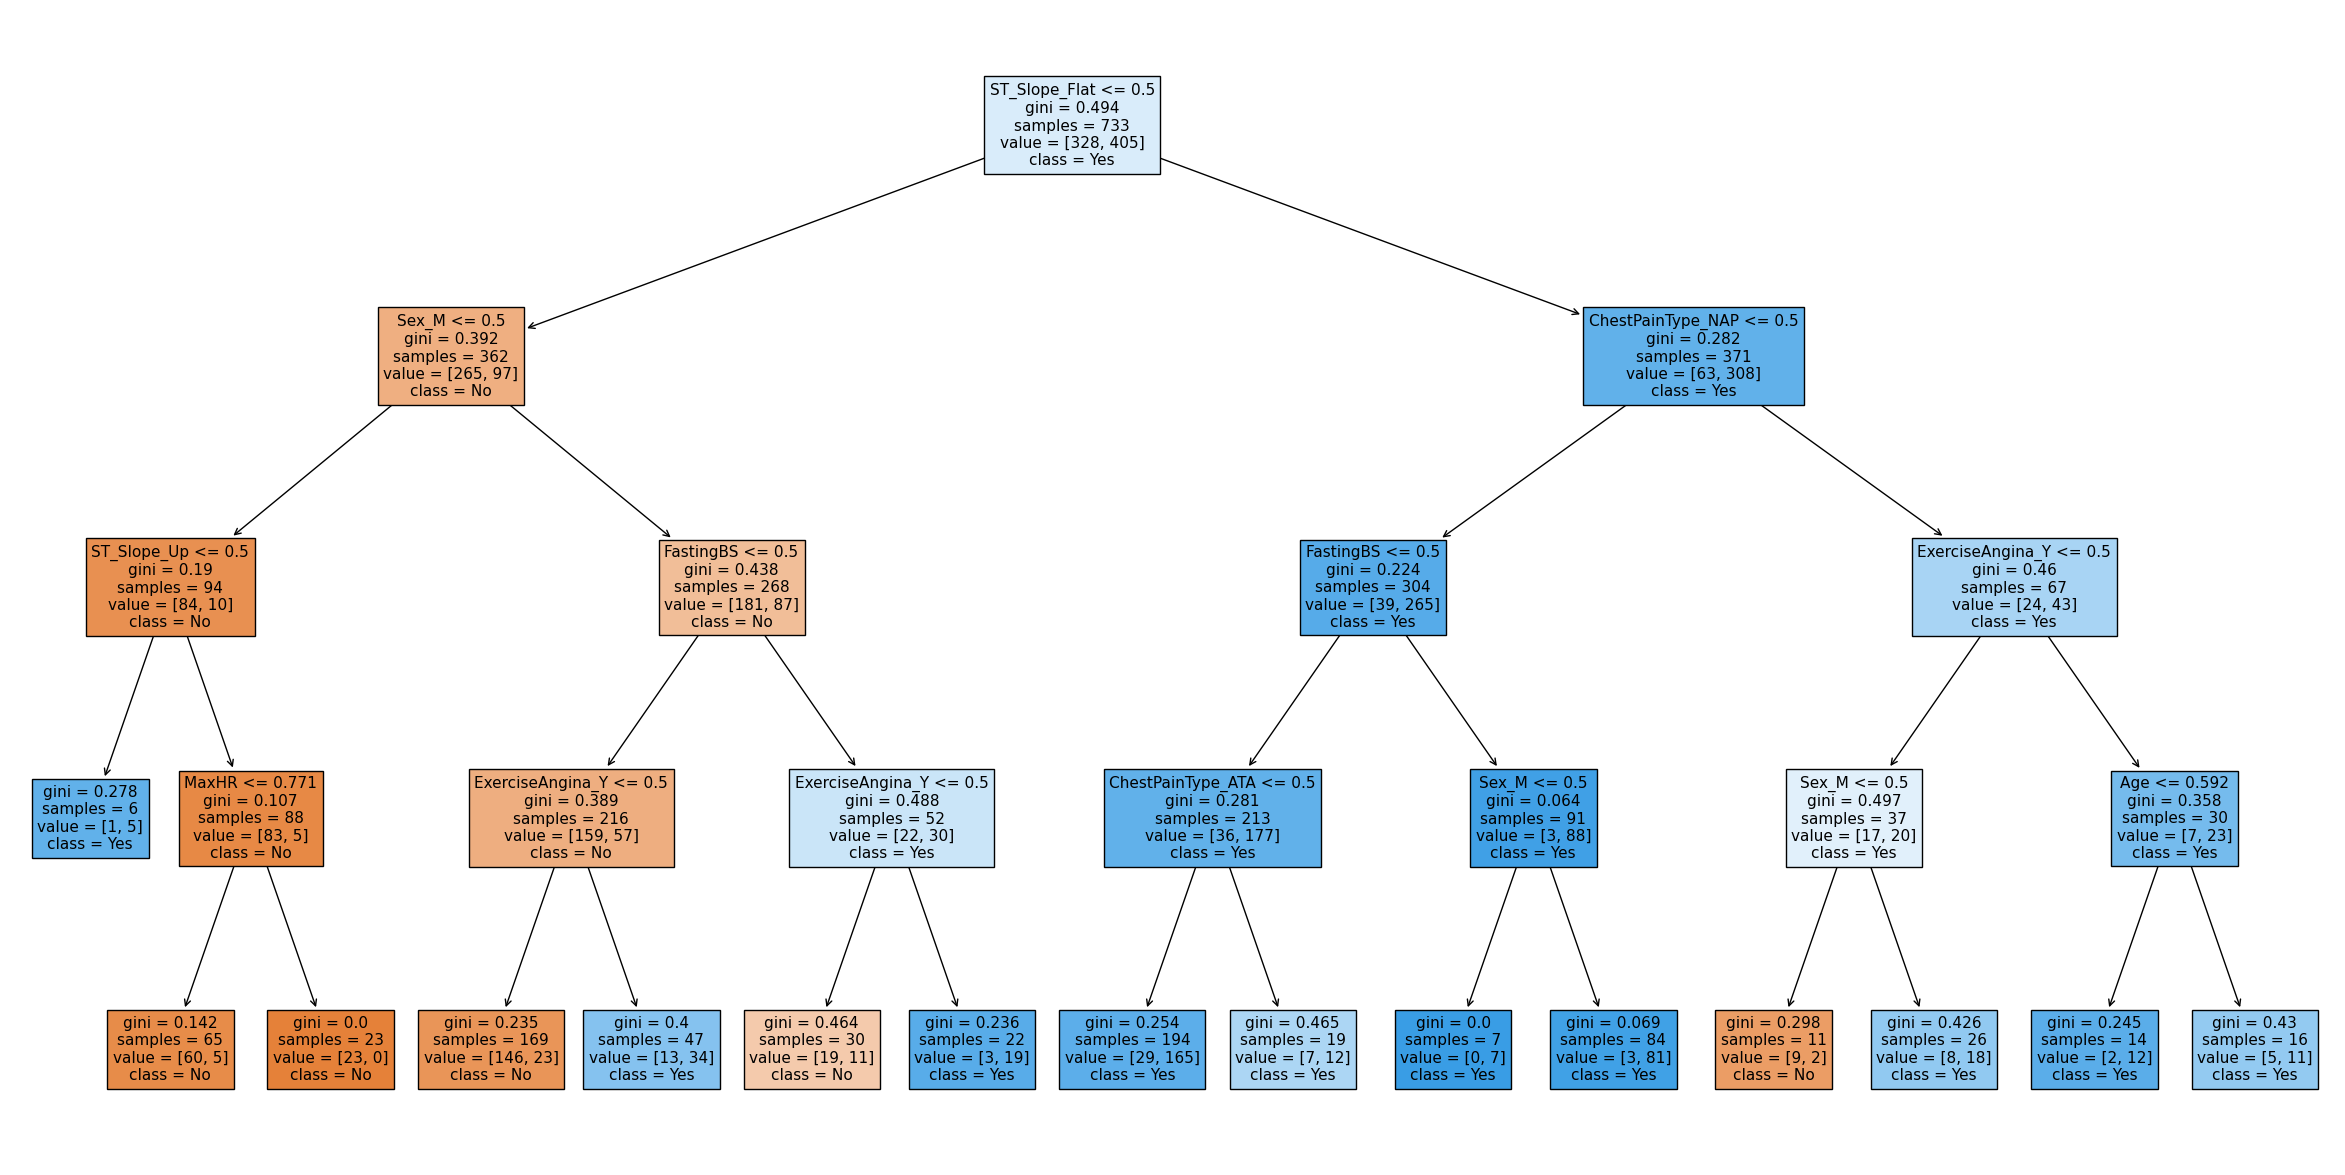

In [104]:
# The best model is trained
model_dt_rel = DecisionTreeClassifier(max_depth=4,
                                      min_samples_split=8,
                                      min_samples_leaf=1,
                                      max_features=2,
                                      random_state=42)
model_dt_rel.fit(X_train_rel, y_train)

# Plot tree
fig = plt.figure(figsize=(30,15))
_ = tree.plot_tree(model_dt_rel,
                   feature_names = X_train_rel.columns.tolist(),
                   class_names = ["No", "Yes"],
                   filled = True,
                   fontsize = 11)

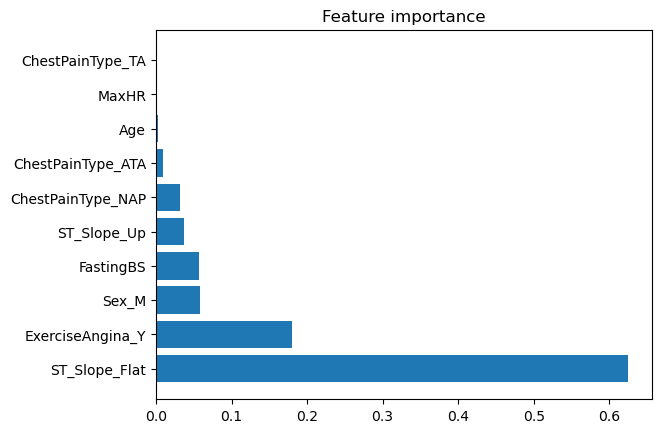

In [105]:
# Feature importance
model_dt_rel_imp = sorted(zip(model_dt_rel.feature_importances_, X_train_rel.columns), reverse=True)
model_dt_rel_imp = dict(model_dt_rel_imp)

plt.barh(list(model_dt_rel_imp.values()), list(model_dt_rel_imp.keys()))
plt.title("Feature importance")
plt.show()

### Random Forest <a id="rf"> </a>

#### Model with all variables

In [106]:
param_grid = {"n_estimators": [50, 100, 200],
              "max_depth": [4, 6, 8, 10, 12, 14],
              "min_samples_split": [2, 4, 6, 8],
              "min_samples_leaf": [1, 2]}
model_rf_all = GridSearchCV(RandomForestClassifier(random_state=42),
                             param_grid = param_grid,
                             scoring = 'f1',
                             cv = 5)
model_rf_all.fit(X_train, y_train)
model_rf_all.best_params_

{'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        82
           1       0.89      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

           Test scores
AUC              93.01
Accuracy         88.04
F1               89.22
Precision        89.22
Recall           89.22


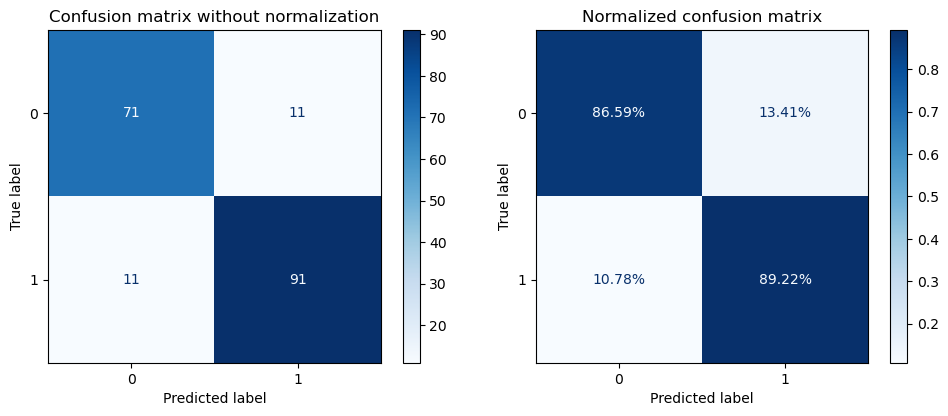

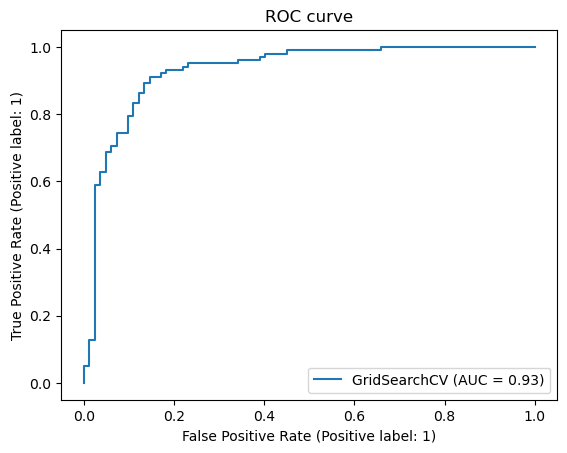

In [107]:
# Predictions
y_pred = model_rf_all.predict(X_test)
y_pred_proba = model_rf_all.predict_proba(X_test)[::,1]

# Classification report
print(classification_report(y_test, y_pred))

# Test scores
model_rf_all_scores = scores(y_test, y_pred, y_pred_proba)
print(model_rf_all_scores)

# Confusion matrix and roc curve
confusion_matrix_and_roc_curve(model_rf_all, X_test, y_test)

#### Model with important variables

In [108]:
param_grid = {"n_estimators": [50, 100, 200],
              "max_depth": [4, 6, 8, 10, 12, 14],
              "min_samples_split": [2, 4, 6, 8],
              "min_samples_leaf": [1, 2]}
model_rf_rel = GridSearchCV(RandomForestClassifier(random_state=42),
                             param_grid = param_grid,
                             scoring = 'recall',
                             cv = 5)
model_rf_rel.fit(X_train_rel, y_train)
model_rf_rel.best_params_

{'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        82
           1       0.85      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

           Test scores
AUC              92.16
Accuracy         84.24
F1               85.99
Precision        84.76
Recall           87.25


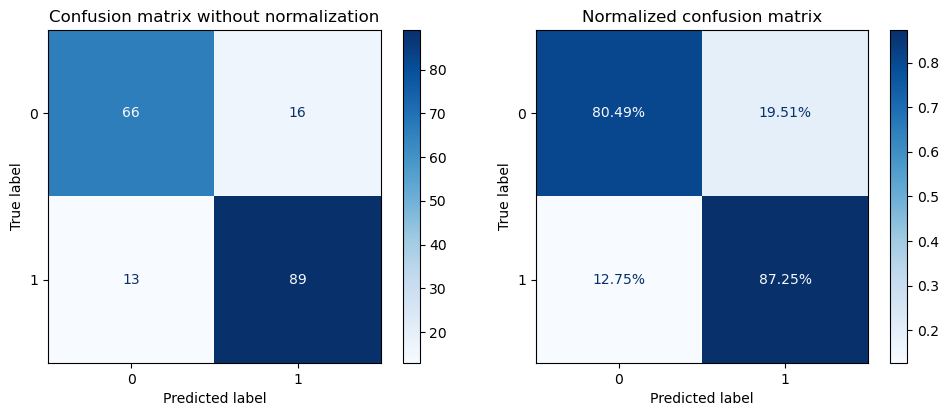

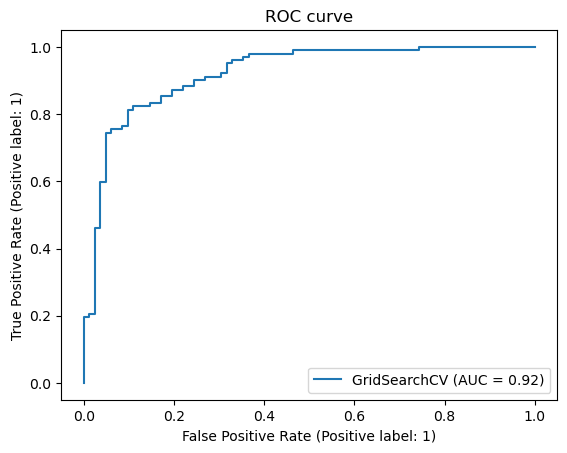

In [109]:
# Predictions
y_pred = model_rf_rel.predict(X_test_rel)
y_pred_proba = model_rf_rel.predict_proba(X_test_rel)[::,1]

# Classification report
print(classification_report(y_test, y_pred))

# Test scores
model_rf_rel_scores = scores(y_test, y_pred, y_pred_proba)
print(model_rf_rel_scores)

# Confusion matrix and roc curve
confusion_matrix_and_roc_curve(model_rf_rel, X_test_rel, y_test)

### Gradient Boosting <a id="gb"> </a>

#### Model with all variables

In [110]:
param_grid = {"n_estimators": [50, 100],
              "max_depth": [4, 6, 8],
              "max_features": [2, 3, 4],
              "learning_rate": [0.01, 0.1, 0.3, 0.5]}
model_gb_all = GridSearchCV(GradientBoostingClassifier(random_state=42),
                             param_grid = param_grid,
                             scoring = 'f1',
                             cv = 5)
model_gb_all.fit(X_train, y_train)
model_gb_all.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'max_features': 3, 'n_estimators': 50}

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        82
           1       0.91      0.90      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

           Test scores
AUC              93.41
Accuracy         89.67
F1               90.64
Precision        91.09
Recall           90.20


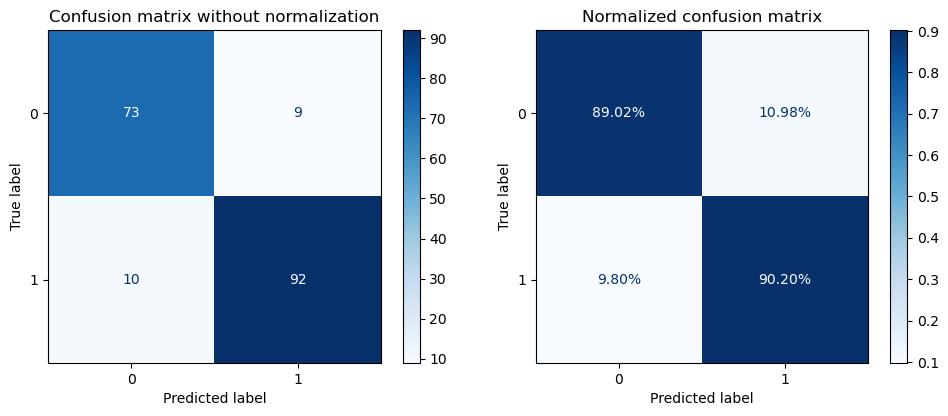

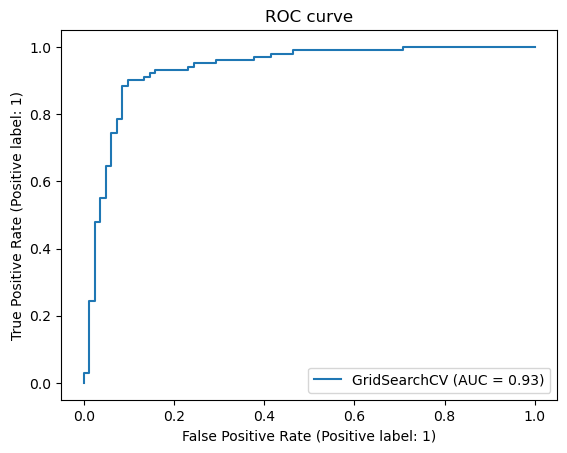

In [111]:
# Predictions
y_pred = model_gb_all.predict(X_test)
y_pred_proba = model_gb_all.predict_proba(X_test)[::,1]

# Classification report
print(classification_report(y_test, y_pred))

# Test scores
model_gb_all_scores = scores(y_test, y_pred, y_pred_proba)
print(model_gb_all_scores)

# Confusion matrix and roc curve
confusion_matrix_and_roc_curve(model_gb_all, X_test, y_test)

#### Model with important variables

In [112]:
param_grid = {"n_estimators": [50, 100],
              "max_depth": [4, 6, 8],
              "max_features": [2, 3, 4],
              "learning_rate": [0.01, 0.1, 0.3, 0.5]}
model_gb_rel = GridSearchCV(GradientBoostingClassifier(random_state=42),
                             param_grid = param_grid,
                             scoring = 'f1',
                             cv = 5)
model_gb_rel.fit(X_train_rel, y_train)
model_gb_rel.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 2, 'n_estimators': 50}

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        82
           1       0.87      0.87      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

           Test scores
AUC              92.91
Accuracy         85.87
F1               87.25
Precision        87.25
Recall           87.25


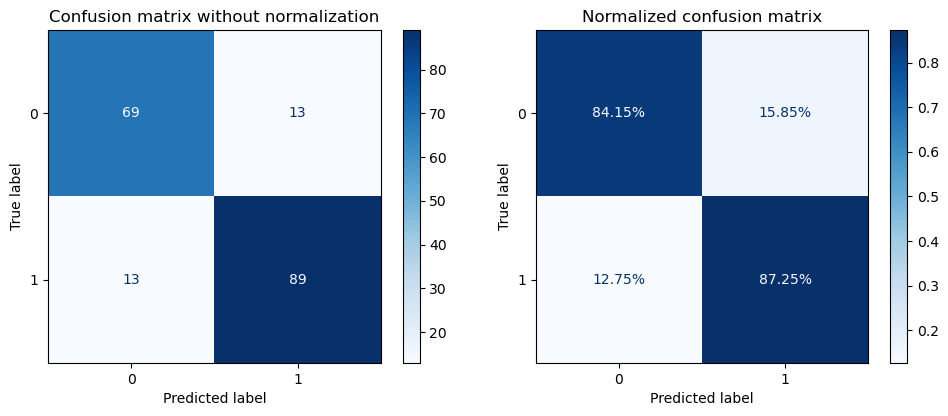

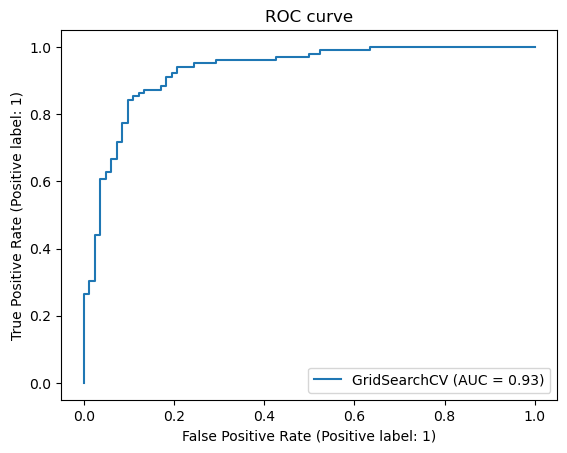

In [113]:
# Predictions
y_pred = model_gb_rel.predict(X_test_rel)
y_pred_proba = model_gb_rel.predict_proba(X_test_rel)[::,1]

# Classification report
print(classification_report(y_test, y_pred))

# Test scores
model_gb_rel_scores = scores(y_test, y_pred, y_pred_proba)
print(model_gb_rel_scores)

# Confusion matrix and roc curve
confusion_matrix_and_roc_curve(model_gb_rel, X_test_rel, y_test)

## 8. Models comparison <a id="models-comparison"> </a>

A table will be created with the metrics obtained with the `scores` function for each model to be able to compare them.

In [114]:
models_lr_scores = pd.concat([model_lr_all_scores, model_lr_rel_scores], axis=1)
models_lr_scores.columns=['All', 'Rel']

models_svm_scores = pd.concat([model_svm_all_scores, model_svm_rel_scores], axis=1)
models_svm_scores.columns=['All', 'Rel']

models_knn_scores = pd.concat([model_knn_all_scores, model_knn_rel_scores], axis=1)
models_knn_scores.columns=['All', 'Rel']

models_dt_scores = pd.concat([model_dt_all_scores, model_dt_rel_scores], axis=1)
models_dt_scores.columns=['All', 'Rel']

models_rf_scores = pd.concat([model_rf_all_scores, model_rf_rel_scores], axis=1)
models_rf_scores.columns=['All', 'Rel']

models_gb_scores = pd.concat([model_gb_all_scores, model_gb_rel_scores], axis=1)
models_gb_scores.columns=['All', 'Rel']

In [117]:
models_scores = pd.concat([models_lr_scores, models_svm_scores, models_knn_scores,
                           models_dt_scores, models_rf_scores, models_gb_scores],
                          axis=1,
                          keys=['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'])
models_scores

LR           SVM           KNN            DT            RF  \
             All    Rel    All    Rel    All    Rel    All    Rel    All   
AUC        93.60  94.13  93.02  89.65  92.54  91.53  87.98  89.89  93.01   
Accuracy   88.59  88.04  85.87  85.87  89.13  86.96  77.72  80.98  88.04   
F1         89.86  89.42  87.74  87.74  90.29  88.46  81.61  82.93  89.22   
Precision  88.57  87.74  84.55  84.55  89.42  86.79  75.21  82.52  89.22   
Recall     91.18  91.18  91.18  91.18  91.18  90.20  89.22  83.33  89.22   

                     GB         
             Rel    All    Rel  
AUC        92.16  93.41  92.91  
Accuracy   84.24  89.67  85.87  
F1         85.99  90.64  87.25  
Precision  84.76  91.09  87.25  
Recall     87.25  90.20  87.25

In [118]:
models_scores.style.format(precision=2).highlight_max(axis=1, color='limegreen').highlight_min(axis=1, color='coral')

In [119]:
models_scores.style.format(precision=2).background_gradient(axis=1)

In general, when observing the five metrics, it can be said **the best model is Gradient Boosting that uses all the variables, since it excees 90% in four of the five metrics.** However, the recall is what we want to maximize, since incorrect predictions of the positive class would be more catastrophic than incorrect predictions of the negative class. And the highest values for recall are achieved by the first five models with 91.18%.

When trying to evaluate cross-validation during training using recall in the first decision tree model, the other four metrics, especially accuracy, have been significantly reduced, making it the worst model.

Looking only at the models that use the variables that initially seemed most important, the one that achieves the best results is the logistic regression model, which obtains the maximum AUC of all the models.

## 9. Conclusions <a id="conclusions"> </a>

The case studied is an interesting real problem. Deaths from cardiovascular diseases represents 32% of annual deaths worlwide. A set of these diseases are cardiac or heart diseases.

**The objective of the study was to create classification algorithms to predict whether a patient suffers from heart disease or not.**

Before training the models, **the data have been visualized and cleaned** to obtain them in the best conditions for modeling: values have been imputed, one-hot coding has been done on the categorical variables and the numerical variables have been normalized.

Thanks to the correlation metrics, the bar graphs and the feature selection process, it was determined **which variables could be most related to the target variable *HeartDisease*:** *MaxHR*, *Oldpeak*, *ChestPainType*, *ST_Slope*, *ExerciseAngina*, and to a lesser extent, *FastingBP*, *Age* and *Sex*. Both with the complete dataset and only with these variables, two models have been created for the six classification techniques.

**The best technique seems to have been Gradient Boosting**, with the model with all the variables being the best for exceeding 90% in four of the five evaluation metrics. On the other hand, just for one sample it has not been the best in sensitivity. When putting such a decisive algorithm into practice, **a balance should be made between sensitivity and specificity.** The first, in this case, is more important, but we don't want an abusive reduction in true negatives at the expense of a slight increase in true positives. The physicians should be part of the final decision, since, although in no case would the algorithm replace them, it would complement them and speed up the process.

## 10. References <a id="references"> </a>

<a id="reference1"> </a>
[1] World Health Organization. (2021). *Cardiovascular diseases (CVDs).* [Online]. Available in: https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

<a id="reference2"> </a>
[2] National Heart, Lung, and Blood Institute. *Know the Differences. Cardiovascular Disease, Heart Disease, Coronary Disease.* [Online]. Available in: https://www.nhlbi.nih.gov/sites/default/files/media/docs/Fact_Sheet_Know_Diff_Design.508_pdf.pdf

<a id="reference3"> </a>
[3] Fedesoriano. (2020). *Heart Failure Prediction Dataset.* Kaggle. [Online]. Available in: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction